In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!pip install ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00


In [ ]:
!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Add this in a Google Colab cell to install the correct version of Pytorch Geometric.
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Looking in links: https://pytorch-geometric.com/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 423, in run
    _, build_failures = build(
                        ^^^^^^
  File "/usr/local/

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from torch_geometric.data import Data
from scipy import sparse
import random
import torch
import math
from tqdm.autonotebook import tqdm
import sklearn.metrics.pairwise as pairwise
from sklearn.metrics import pairwise_distances
from collections import defaultdict
from functools import lru_cache
from collections import defaultdict


def get_X_Y_data_coordiate(file_path, ground_path, layout_row = 4, spot_in_fov=20, spot_in_fov_col=4):
    spot_gene_expression = pd.read_csv('GNNdata/spot_gene_expression.csv')
    maxfov = spot_gene_expression['fov'].max()
    row = math.ceil(maxfov / layout_row)
    right_top = row * layout_row
    gene_exp_matrix = [[[0,0] for _ in range(spot_in_fov)] for _ in range(maxfov)]
    for fov in range(1,maxfov+1):
        start_point = (((maxfov - fov) // layout_row) * 4, ((layout_row -1) - (right_top-fov) % layout_row) * 5 )
        for spot in range(1,spot_in_fov+1):
            # offset according with 1
            gene_exp_matrix[fov-1][spot-1][0] = start_point[0] + (spot-1) % spot_in_fov_col
            gene_exp_matrix[fov-1][spot-1][1] = start_point[1] + (spot-1)// spot_in_fov_col
    gene_expression = spot_gene_expression.to_numpy()[:,3:]
    gene_exp_matrix = np.array(gene_exp_matrix).reshape(-1,2)
    label = pd.read_csv(ground_path)
    label = label.to_numpy()[:,3:]
    return gene_expression, gene_exp_matrix, label


def remove_self_loop(adj, weight):
    not_mask = []
    for idx, i in enumerate(adj):
        if i[0] != i[1]:
            not_mask.append(idx)
    return adj[not_mask], weight[not_mask]

def distance_matrix_threshold_2_adj(distance_matrix, threshold=5, self_loop=False):
    x, y = np.where(distance_matrix <= threshold)
    adj = np.vstack([x,y]).T
    weight = distance_matrix[x,y]
    if not self_loop:
        adj, weight = remove_self_loop(adj, weight)

    return adj, weight


def get_adj(data, Y=None, topk=5, distance_metric="l2", threshold=None):
    # if threshold has given, topk will not work
    distance_matrix = pairwise_distances(data, Y=Y, metric=distance_metric)
    if not threshold:
        adj, weight = distance_matrix_topk_2_adj(distance_matrix, topk)
    else:
        adj, weight = distance_matrix_threshold_2_adj(distance_matrix, threshold=threshold)
    return adj, weight

def array_2_np_index(idx_arr):
    res = []
    for e,i in enumerate(idx_arr):
        res += [(e,j) for j in i if e!=j]
    res = np.array(res)
    idx, jdx = res[:,0], res[:,1]
    return idx, jdx

def distance_matrix_topk_2_adj(distance_matrix,topk=5):

    sorted_arr = np.argsort(distance_matrix)[:,:topk]
    idx, jdx = array_2_np_index(sorted_arr)
    adj = np.vstack((idx,jdx)).T
    weight = distance_matrix[idx,jdx]
    return adj, weight

def distance_matrix_normalize(adj):
    # handle adj_weight
    # adj_weight normlize into (0.1,1)
    # need attention : the minimun is the largest since the weight is the great
    link, link_weight = adj
    maxv = max(link_weight)
    minv = min(link_weight)
    link_weight = (maxv - link_weight) / (maxv - minv) + 0.1
    return link, link_weight

def union_adj(adj_list, weight_list=[0.3,0.7]):
    memory = defaultdict(lambda :defaultdict(bool))
    memory_idx = defaultdict(lambda : defaultdict(int))
    memory_val = defaultdict(lambda : defaultdict(list))
    adj_link_total = []
    adj_weight_total = []
    for adj in adj_list:

        adj_link, adj_weight = adj
        for idx, dl in enumerate(adj_link):
            if memory[dl[0]][dl[1]] == True:
                # weight TODO
                memory_val[dl[0]][dl[1]].append(adj_weight[idx])
                temp_idx = memory_idx[dl[0]][dl[1]]
                cur_len = len(memory_val[dl[0]][dl[1]])
                if cur_len == 1:
                    adj_weight_total[temp_idx] = adj_weight_total[temp_idx] * weight_list[0] + adj_weight[idx]*weight_list[1]
                else:
                    adj_weight_total[temp_idx] += adj_weight[idx]*weight_list[cur_len]

            else:
                memory[dl[0]][dl[1]] = True
                adj_link_total.append(dl)
                memory_idx[dl[0]][dl[1]] = len(adj_link_total)
                adj_weight_total.append(adj_weight[idx])
    return np.array(adj_link_total), np.array(adj_weight_total)


class Graph:
    # genernal

    def __init__(self, graph = None, X=None, adj_link=None, adj_weight=None, label=None):
        # deep copy for each attribute
        if graph:
            self.X = graph.X.copy()
            self.adj_link = graph.adj_link.copy()
            self.adj_weight = graph.adj_weight.copy()
            # if graph.label is None:
            #     pass
            # else:
            self.label = graph.label.copy()
        else:
            self.X = X.copy()
            self.adj_link = adj_link.copy()
            self.adj_weight = adj_weight.copy()

            self.label = label.copy()

    def set_region(self,graph_region):
        self.graph_region = graph_region

    def set_label(self, label):
        self.label = label

    def __repr__(self,):
        return "X:"+str(self.X.shape)+"; adj_link: "+str(self.adj_link.shape)

    def __str__(self):
        return self.__repr__()

    def __hash__(self):
        pass

def sample_fovs_graph(fpath, gpath, locationpath, topk=5, normalize=True, threshold=None):
    spot_gene_expression = pd.read_csv('GNNdata/spot_gene_expression.csv')
    X = spot_gene_expression.to_numpy()[:,3:]

    label = pd.read_csv(gpath)
    label = label.to_numpy()[:,3:]

    location = pd.read_csv(locationpath)
    cor = location.to_numpy()[:,3:]

    spatial_adj = get_adj(cor, topk=topk, threshold=threshold)
    gene_adj = get_adj(X, topk=topk)
    if normalize:
        spatial_adj = distance_matrix_normalize(spatial_adj)
        gene_adj = distance_matrix_normalize(gene_adj)
    adj_link, adj_weight = union_adj([spatial_adj, gene_adj])

    return Graph(X=X, adj_link=adj_link, adj_weight=adj_weight, label=label)

def single_graph(fpath, gpath, topk=5, normalize=True, threshold=None, union_method="union"):

    X, cor,label = get_X_Y_data_coordiate(fpath, gpath)
    spatial_adj = get_adj(cor, topk=topk, threshold=threshold)
    gene_adj = get_adj(X, topk=topk)

    if normalize:
        spatial_adj = distance_matrix_normalize(spatial_adj)
        gene_adj = distance_matrix_normalize(gene_adj)
    adj_link, adj_weight = union_adj([spatial_adj, gene_adj])
    # import ipdb
    # ipdb.set_trace()

    return Graph(X=X, adj_link=adj_link, adj_weight=adj_weight, label=label)


def ingraph(pair, graph_region):
    # graph_region records the region of each graph
    #     such as [a,b,c,d]: the graph region is (0,a), (a,b), (b,c), (c,d) left concluded and right open
    prev = 0
    for region in graph_region:# will add additional loop
        if pair[0] < prev or pair[1] < prev:
            break
        if prev<=pair[0]<region and prev<=pair[1]<region:
            return True
        prev = region
    return False


def remove_inner_graph_link(adj_link, adj_weight, graph_region=[]):

    keep_idx = []
    for idx,pair in enumerate(adj_link):
        if not ingraph(pair, graph_region=graph_region):
            keep_idx.append(idx)

    return adj_link[keep_idx], adj_weight[keep_idx]

def adj_add_region(adj_link, i_idx, j_idx , graph_region):
    left_offset = 0 if i_idx == 0 else graph_region[i_idx-1]
    right_offset= graph_region[j_idx-1]
    adj_link_list= adj_link.tolist()
    adj_link_list = [ [ left_offset + i[0], right_offset + i[1]] for i in adj_link_list]
    return np.array(adj_link_list)

def multi_pair_distance(multi_players,
                        distance_metric="l2",
                        topk=5,
                        threshold=None,
                        normalize=True,
                        graph_region=[],
                        ):

    # as the same as pair distance
    # complexity:  $n*(n-1) / 2$  $C_{n}^{2}$ but will accelerate by
    adj = [] # ((graph_id, node_id, grpah_id, node_id))
    weight = [] # just weight

    for graph_id_i in range(len(multi_players)):

        for graph_id_j in range(graph_id_i+1,len(multi_players)):

            temp_adj, temp_adj_weight = get_adj(multi_players[graph_id_i],
                                                multi_players[graph_id_j],
                                                distance_metric=distance_metric,
                                                threshold=threshold,
                                                topk = topk)

            temp_adj = adj_add_region(temp_adj, graph_id_i, graph_id_j, graph_region=graph_region )

            adj += temp_adj.tolist()
            weight += temp_adj_weight.tolist()

    adj, weight = np.array(adj), np.array(weight)

    if normalize:
        adj, weight = distance_matrix_normalize((adj, weight))

    return adj, weight


def union_graph(graph_list,
                method="link_expression",
                topk=5,
                distance_metric='l2',
                threshold=None,
                union_method="point2point"):

    # problem :
    #    1. union graph_list by method
    #    2. graph node number need modified (graph adj also need modified)
    #    3.

    # Solution :
    #    1. first link all graph and renum the nodes and adj
    #    2. use $method$ to add adj into huge adj

    if union_method not in ["total", "point2point"]:

        ValueError("union_method in union_graph now only support 'total' and 'point2point'")


    union_graph = Graph(graph=graph_list[0])

    graph_region = []
    multi_players = [graph_list[0].X]
    # first renum each graph
    for graph in graph_list[1:]:

        multi_players.append(graph.X)

        prev = union_graph.X.shape[0]
        graph_region.append(prev)
        union_graph.adj_weight = np.concatenate([union_graph.adj_weight,graph.adj_weight])
        # renum node in adj
        temp_adj_link = graph.adj_link + prev
        temp_adj_link = np.concatenate([union_graph.adj_link, temp_adj_link])
        union_graph.adj_link = temp_adj_link

        # label
        union_graph.X = np.concatenate([union_graph.X, graph.X])
        union_graph.label = np.concatenate([union_graph.label, graph.label])

    graph_region.append(union_graph.X.shape[0])
    # use gene expression to add link

    if union_method == "total":
        # method 1
        adj_link, adj_weight = get_adj(union_graph.X, topk=topk, distance_metric=distance_metric, threshold=threshold)
        adj_link, adj_weight = remove_inner_graph_link(adj_link, adj_weight, graph_region=graph_region)
        # remove the inner-graph link
    else:
        # method 2

        # use graph_region to split graph

        adj_link, adj_weight = multi_pair_distance(multi_players,
                                                   topk=topk,
                                                   distance_metric=distance_metric,
                                                   threshold=threshold,
                                                   graph_region=graph_region)

    adj_link, adj_weight  = distance_matrix_normalize((adj_link, adj_weight))
    union_graph.adj_link  = np.concatenate([union_graph.adj_link, adj_link]).T
    union_graph.adj_weight= np.concatenate([union_graph.adj_weight, adj_weight])
    # records region in graph
    union_graph.set_region(graph_region)
    return union_graph


def mask_graph(graph, masked_graph_idx=[0], return_validation=True, validate_split = 0.2):
    # take attention :
    # mask generation : training: (appointed graph) test
    # train mask : random mask

    # note: masked_graph may be a list

    graph_region = graph.graph_region
    test_mask = []
    for masked_graph in masked_graph_idx:
        left = 0 if masked_graph == 0 else graph_region[masked_graph-1]
        right= graph_region[masked_graph]
        test_mask += [i for i in range(left, right)]

    remain_graph_idx = [i for i in range(len(graph_region)) if i not in masked_graph_idx]
    remain_mask = []
    for remain_graph in remain_graph_idx:
        left = 0 if remain_graph == 0 else graph_region[remain_graph-1]
        right= graph_region[remain_graph]
        remain_mask += [i for i in range(left, right)]

    if not return_validation:
        return test_mask, remain_mask, []

    validate_num = int(graph_region[-1] * validate_split)
    validate_mask = random.choices(remain_mask, k=validate_num)
    validate_set = set(validate_mask)
    validate_mask = list(validate_set)
    train_mask = [i for i in remain_mask if i not in validate_set]
    return test_mask, train_mask, validate_mask


In [ ]:
# import mydata
import matplotlib.pyplot as plt
import torch_geometric as pyg
import torch.nn as nn
import torch
from torch_geometric.nn import GCNConv, GATConv
import torch.nn.functional as F
from collections import defaultdict
import numpy as np
from torch_geometric.data import data as D
from tqdm.notebook import tqdm
import os
import pandas as pd

In [ ]:


class SingletonMeta(type):
    __instance = None
    def __call__(cls,*args,**kwargs):
        if not cls.__instance:
            cls.__instance = type.__call__(cls,*args,**kwargs)
        return cls.__instance

class HugeLog():

  def __init__(self,fpath="log.md"):

    self.f = open(fpath, 'w')
    self.content = defaultdict(list)

  def write(self,content):
    if type(content) != str:
      self.f.write(str(content)+"\n")
    else:
      self.f.write(content+"\n")
    self.f.flush()

  def appendImage(self, key, img):
    # where to cache the image
    self.content[key].append(img)

  def prefixWrite(self, content, prefix="[info]  "):

    if type(content) != str:
      self.write(prefix + str(content))
    else:
      self.write(prefix + content)


  def info(self,content):

    self.prefixWrite(content, prefix="[info]. ")

  def error(self, content):
    self.prefixWrite(content, prefix="[Error]. ")


  def other(self,fun,content):
    self.write(fun(content))


In [ ]:

def preprocess_X(X,epsilon=0.00001):

    mean = X.mean()
    var  = X.var()
    X = (X - mean) / (var + epsilon)
    return X


def preprocess_Y(Y, weight_list=None):
  if weight_list:
    Y = Y / np.array(weight_list)
  else:
    weight_list = [100] + [50] * 17
    Y = Y / weight_list
  return Y


def preprocess_Y_Propobability_softmax(Y):

  temp = Y
  temp = np.exp(temp)
  temp = (temp.T / temp.sum(axis=-1)).T
  return temp


def preprocess_Y_Propobability(Y, theta=0.000001):

  temp = Y
  temp = (temp.T / (temp.sum(axis=-1) + theta)).T
  return temp

In [ ]:
def pyg_data_maker(x,y,edge_index, edge_attr, train_mask, val_mask, test_mask,
                   x_preprocess = True, ):

    data = D.Data()

    if x_preprocess:
      x = preprocess_X(x)

    y = preprocess_Y_Propobability(y)

    x = torch.tensor(x,dtype=torch.float)
    y = torch.tensor(y,dtype=torch.float)
    edge_index = torch.tensor(edge_index.T,dtype=torch.long)
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)

    data.x, data.y, data.edge_index, data.edge_attr, data.train_mask, data.val_mask, data.test_mask =  x,y,edge_index, edge_attr, train_mask, val_mask, test_mask
    return data

In [ ]:
def fake_graph_generate(nodes, nodes_shape):

  X = np.random.rand(nodes, nodes_shape)
  adj, adj_weight = get_adj(X,topk=5)
  return X, adj, adj_weight

In [ ]:
# model


class GCN(nn.Module):
    # def __init__(self, nfeat=980, nhid=256, gnn_out=64, mlp_hidden=36, nout=18, dropout=0.1):
    # cell type: 38
    # def __init__(self, nfeat=979, nhid=256, gnn_out=64, mlp_hidden=36, nout=38, dropout=0.1):

    # cell type: 35
    def __init__(self, nfeat=979, nhid=256, gnn_out=64, mlp_hidden=36, nout=35, dropout=0.1):

        super(GCN, self).__init__()

        self.gc1 = GCNConv(nfeat, nhid)
        self.gc2 = GCNConv(nhid, gnn_out)

    def reset_parameters(self):
        self.gc1.reset_parameters()
        self.gc2.reset_parameters()
        # self.mlp.reset_parameters()

    def forward(self, data):
        x =  data.x
        adj = data.edge_index
        weight = data.edge_attr
        x = F.leaky_relu(self.gc1(x, adj, weight))
        x = self.gc2(x, adj, weight)
        return x


In [ ]:

def saveResult(prefix):
  if os.path.isdir(prefix):
    pass
  else:
    os.mkdir(prefix)

def savefig(prefix, content=['train','test','val','test-jsd','test-mse',
                             'test-mae','val-jsd','val-mse','val-mae',
                             "train-mae",'train-jsd','train-mse']):
  for item in content:
    fig = plt.figure()
    plt.plot(total_loss_collect[item])
    plt.title(prefix+"/"+item)
    plt.savefig(prefix+"/"+item+".png")


def logrecord(prefix=None):

  content = ['test-jsd','test-mae','test-mse','test-pcc',
             'val-jsd','val-mae', 'val-mse', 'val-pcc',
             'train-jsd', 'train-mae','train-mse', 'train-pcc']


  for item in content:
    mylog.info("min " + item + " : " + str(min(total_loss_collect[item][:-2])))
    mylog.info("select" + item + " : " + str(total_loss_collect[item][-1]))


def outputSave(prefix=None, data=None):

  # cell type: 38
  # columns = "Ascending.vasa.recta.endothelium	B-cell	Connecting.tubule	Descending.vasa.recta.endothelium	Distinct.proximal.tubule.1	Distinct.proximal.tubule.2	Epithelial.progenitor.cell	Fibroblast	Glomerular.endothelium	Indistinct.intercalated.cell	MNP.a.classical.monocyte.derived	MNP.b.non.classical.monocyte.derived	MNP.c.dendritic.cell	Myofibroblast	NK	Pelvic.epithelium	Peritubular.capillary.endothelium.1	Peritubular.capillary.endothelium.2	Podocyte	Principal.cell	Proliferating.Proximal.Tubule	Proximal.tubule	T CD4 memory	T CD4 naive	T CD8 memory	T CD8 naive	Thick.ascending.limb.of.Loop.of.Henle	Transitional.urothelium	Treg	Type.A.intercalated.cell	Type.B.intercalated.cell	mDC	macrophage	mast	monocyte	neutrophil	pDC	plasmablast".split("	")

  # cell type: 35
  columns = "Ascending.vasa.recta.endothelium	B-cell	Connecting.tubule	Descending.vasa.recta.endothelium	Distinct.proximal.tubule.1	Distinct.proximal.tubule.2	Epithelial.progenitor.cell	Fibroblast	Glomerular.endothelium	Indistinct.intercalated.cell	MNP.a.classical.monocyte.derived	MNP.b.non.classical.monocyte.derived	MNP.c.dendritic.cell	Myofibroblast	NK	Pelvic.epithelium	Peritubular.capillary.endothelium.1	Peritubular.capillary.endothelium.2	Podocyte	Principal.cell	Proliferating.Proximal.Tubule	Proximal.tubule	T CD4 memory	T CD4 naive	T CD8 memory	T CD8 naive	Thick.ascending.limb.of.Loop.of.Henle	Treg	Type.A.intercalated.cell	Type.B.intercalated.cell	macrophage	mast	monocyte	pDC	plasmablast".split("	")

  data = F.softmax(model(data),dim=1).detach().cpu().numpy()

  columns = columns[-1 * data.shape[-1]:]
  split_idx = [0,800,1600, len(data)]
  for idx in range(len(split_idx)-1):
    df = pd.DataFrame(data[split_idx[idx] : split_idx[idx+1]], columns=columns)
    df.to_csv(prefix+"-predict-{}.csv".format(idx))

In [ ]:

# target = torch.tensor([3, -0.5, 2, 7])
# preds = torch.tensor([2.5, 0.0, 2, 8])
# pearson = PearsonCorrCoef()
# a = pearson(preds, target)
# b = (pearson(torch.tensor([3, -0.5, 2, 7]), torch.tensor([3, -0.5, 2, 7])))


# pcc_list = []
# pcc_list.append(a)
# pcc_list.append(b)
# print(pcc_list)

# tensor_sum = torch.zeros_like(pcc_list[0])
# print(tensor_sum)
# for tensor in pcc_list:
#     tensor_sum += tensor
# tensor_average = tensor_sum / len(pcc_list)
# print(tensor_average)

In [ ]:
def pcc(p, q):
    p_mean = torch.mean(p)
    q_mean = torch.mean(q)
    p_centered = p - p_mean
    q_centered = q - q_mean
    numerator = torch.sum(p_centered * q_centered)
    denominator = torch.sqrt(torch.sum(p_centered ** 2)) * torch.sqrt(torch.sum(q_centered ** 2))
    pearson_coef = numerator / denominator
    return torch.nan_to_num(pearson_coef)

# def pcc(p, q):
#   from torchmetrics import PearsonCorrCoef
#   device = 'cuda' if torch.cuda.is_available() else 'cpu'

#   pearson = PearsonCorrCoef().to(device)
#   pcc_list = []

#   for i in range(len(p)):
#     # r = torch.nan_to_num(pearson(p[i], q[i]))
#     r = (pearson(p[i], q[i]))
#     pcc_list.append(r)

#   tensor_sum = torch.zeros_like(pcc_list[0])
#   for tensor in pcc_list:
#       tensor_sum += tensor
#   tensor_average = tensor_sum / len(pcc_list)
#   return tensor_average

# def pcc(p, q):
#   p = p.detach().cpu().numpy()
#   q = q.detach().cpu().numpy()
#   pcc_list = []
#   from scipy.stats import pearsonr
#   for i in range(len(p)):
#       r = np.nan_to_num(pearsonr(p[i], q[i]))
#       pcc_list.append(r[0])
#   pcc_result = np.mean(pcc_list)
#   return pcc_result

# def jsd(p, q):
#   p = p.detach().cpu().numpy()
#   q = q.detach().cpu().numpy()

#   jsd_list = []
#   from scipy.spatial.distance import jensenshannon
#   for i in range(len(p)):
#     r = np.nan_to_num(jensenshannon(p[i], q[i]))
#     jsd_list.append(r)
#   jsd_result = np.mean(jsd_list)
#   return jsd_result

def jsd(p_output, q_output):
  """
  Function that measures JS divergence between target and output logits:
  """
  KLDivLoss = nn.KLDivLoss(reduction='batchmean')
  log_mean_output = ((p_output + q_output )/2).log()
  jsd_result = (KLDivLoss(log_mean_output, p_output) + KLDivLoss(log_mean_output, q_output))/2
  return torch.nan_to_num(jsd_result)


def mse(p, q):
  return (p - q).pow(2).mean()

def mae(p, q):
  return (p - q).abs().mean()

score_fns = [jsd, mse, mae, pcc]

# score_fns = [mse, mae]

In [ ]:
def score_fn(input_, target, mask, softmax=True, prefix='test'):

  p = input_[mask]

  if softmax:
    p = F.softmax(p, dim=1)

  q = target[mask]

  # print("p:", p)
  # print("q:", q)

  # import ipdb
  # ipdb.set_trace()

  for fn in score_fns:
    total_loss_collect[prefix + "-" +fn.__name__].append(fn(p, q).item())
  return torch.tensor(0)


def loss_fn(input_, target, mask):
  # input_logit = F.softmax(input_[mask],dim=1)
  # target_logit= F.softmax(target[mask],dim=1)
  input_logit = input_[mask]
  target_logit = target[mask]
  loss = F.cross_entropy(input_logit, target_logit)
  return loss


def test_with_masked_type(test_type=[0,1,2,3]):
  gnn_out= len(test_type)
  model = GCN(979, gnn_out=gnn_out , nout=len(test_type))
  # print(model)
  model = fit_mask(data, model, 2000, lr=lr, weight_decay=weight_decay, test_type=test_type)
  return model

def fit_mask(data, model, epoches, lr=0.0001, weight_decay=0.99, test_type=[0,1,2]):

  if torch.cuda.is_available():
    model = model.cuda()
    data = data.cuda()

  opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
  # print("learning parameters: lr",lr)
  # train
  for epoch in tqdm(range(epoches)):
    train_mask_fn(data, model, opt, test_type)
    inference(data, model, test_type, prefix='val')
    inference(data, model, test_type, prefix='test')
    epoch_end(model)

  model = project_end(model)
  inference(data, model, test_type, prefix='train')
  inference(data, model, test_type, prefix='val')
  inference(data, model, test_type, prefix='test')
  return model

def epoch_end(model):

  val_list = total_loss_collect['val-mse']
  if len(val_list) > 1:
    if min(val_list) != val_list[-1]:
      pass
    else:
      torch.save(model.state_dict(), "best_model.pt")

  else:
    torch.save(model.state_dict(), "best_model.pt")

def project_end(model):
  model.load_state_dict(torch.load("best_model.pt"))
  return model


def train_mask_fn(data, model, opt, test_type=[0,1,2]):
  model.train()
  train_mask_ = data.train_mask
  label = data.y
  pred = model(data)

  loss = loss_fn(pred, label[:,test_type], train_mask_)
  score= score_fn(pred, label[:,test_type], train_mask_, prefix='train')

  total_loss_collect['train'].append(loss.item())
  opt.zero_grad()
  loss.backward()
  opt.step()


def inference(data, model, test_type=[0,1,2,3], prefix='val'):

  model.eval()
  mask = getattr(data, prefix+"_mask")
  label = data.y
  pred = model(data)
  loss = loss_fn(pred, label[:,test_type], mask)
  score= score_fn(pred, label[:,test_type], mask, prefix=prefix)

  total_loss_collect[prefix].append(loss.item())

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

<ipython-input-13-0eba7090b6b7>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

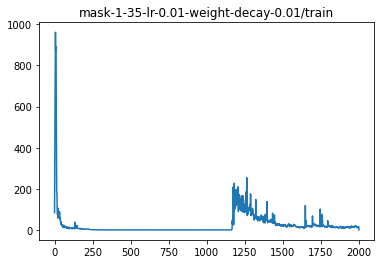

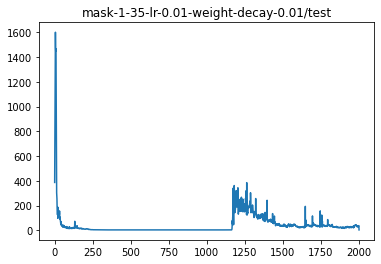

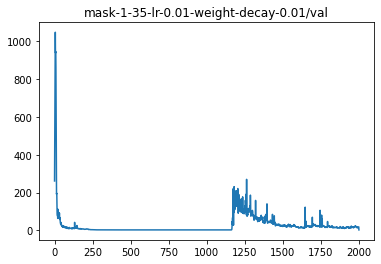

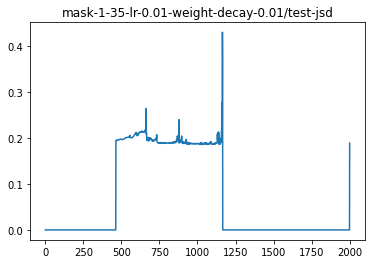

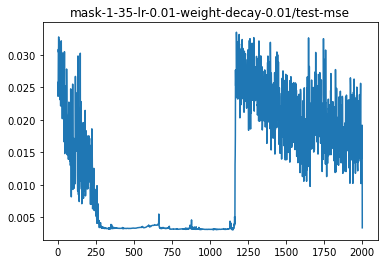

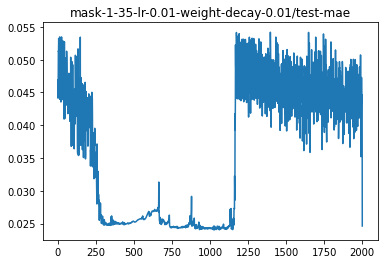

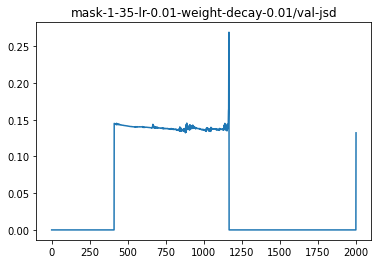

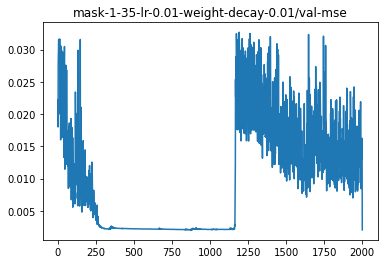

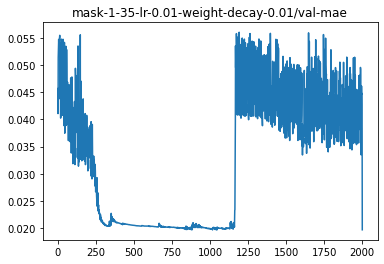

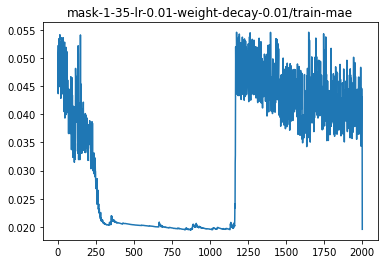

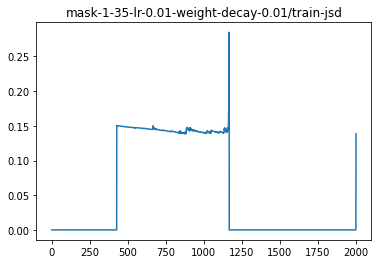

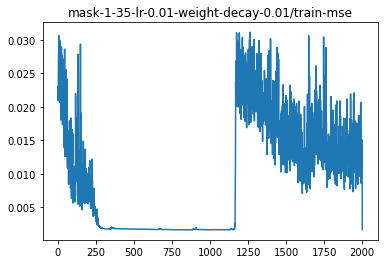

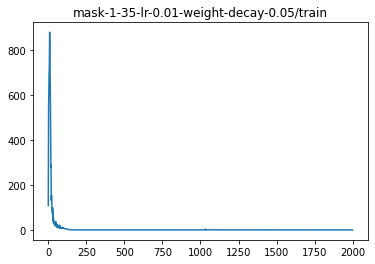

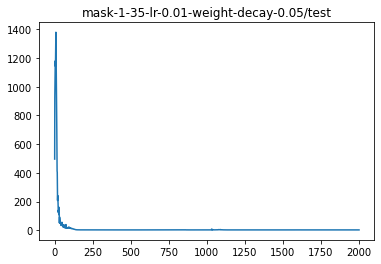

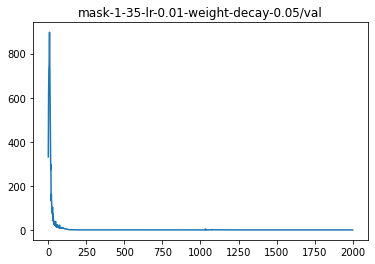

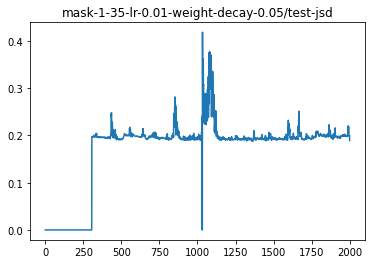

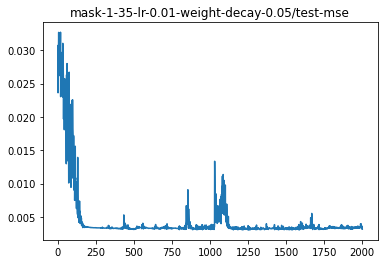

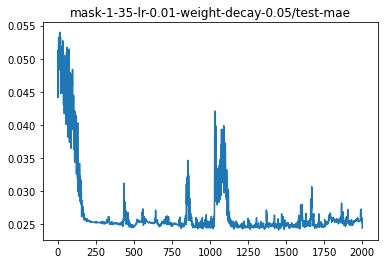

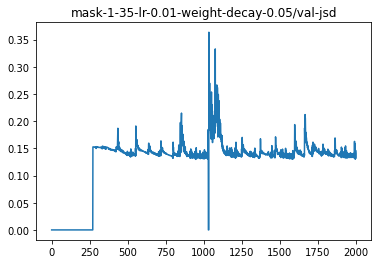

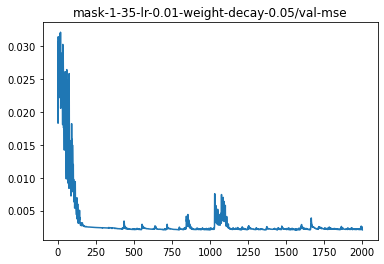

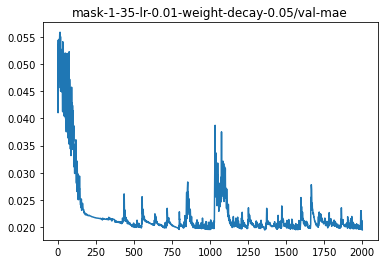

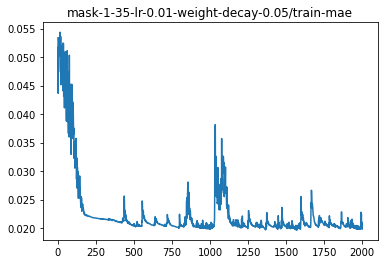

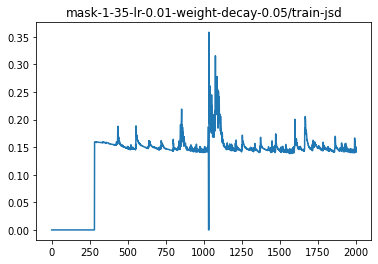

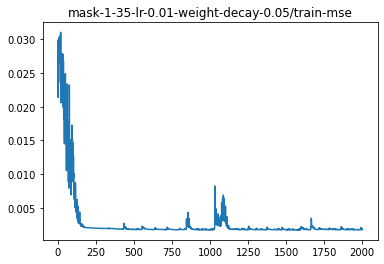

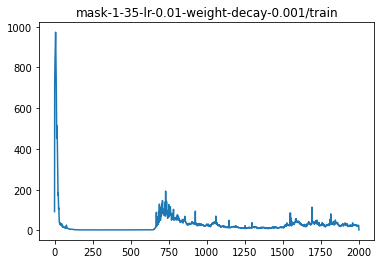

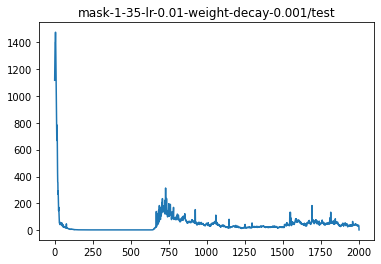

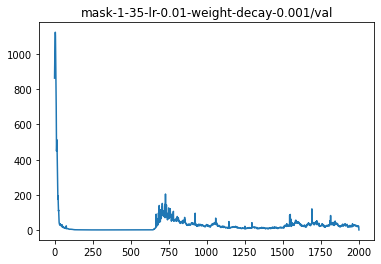

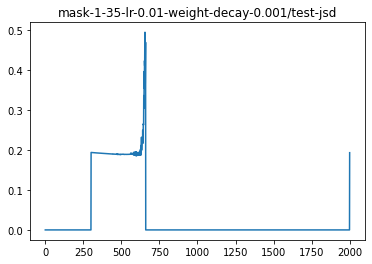

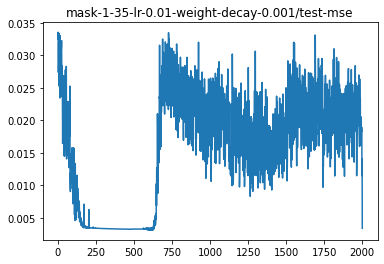

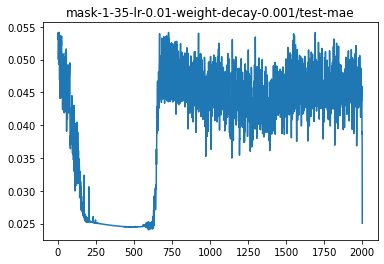

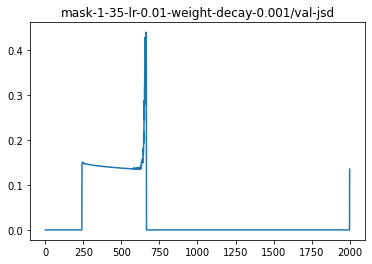

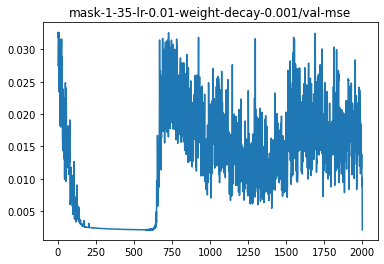

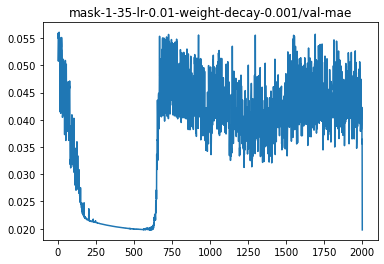

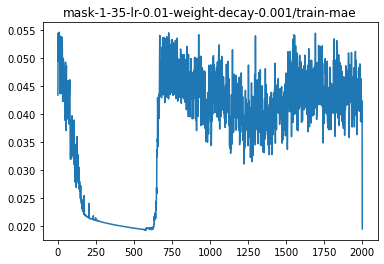

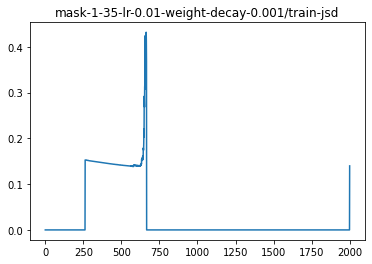

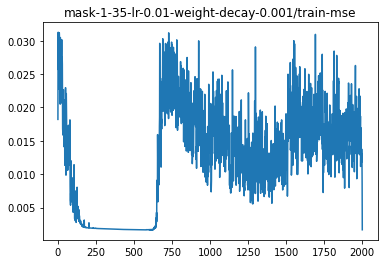

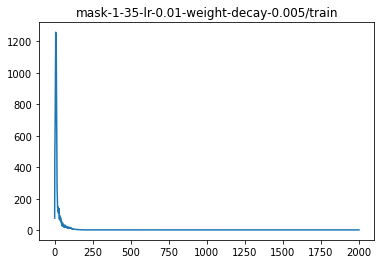

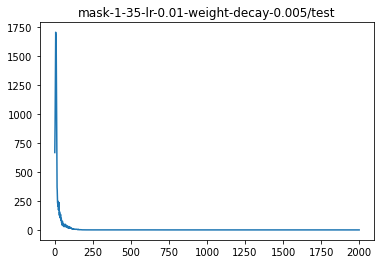

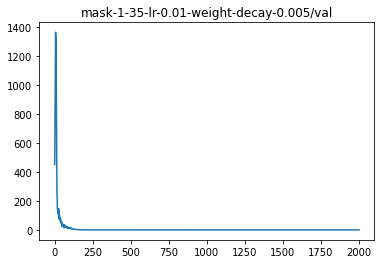

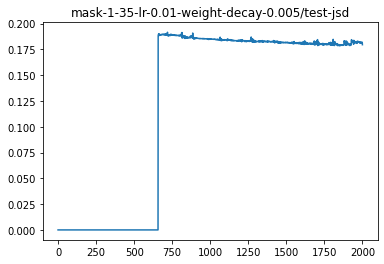

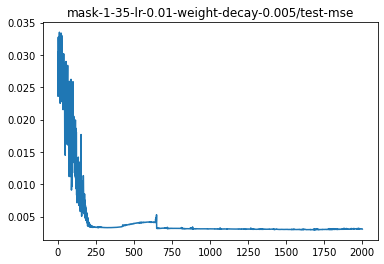

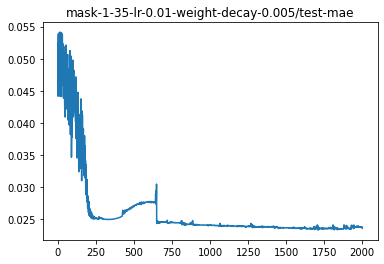

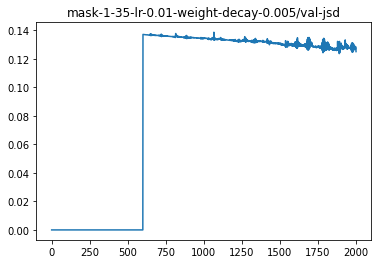

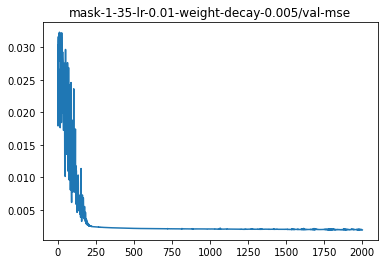

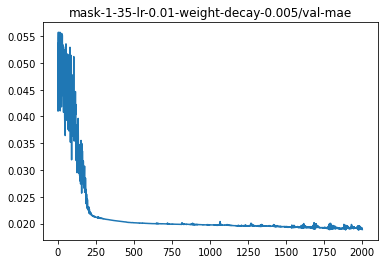

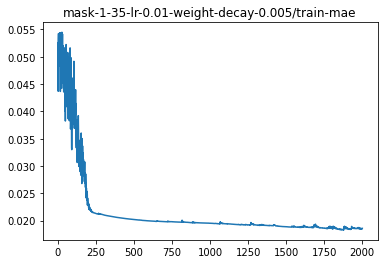

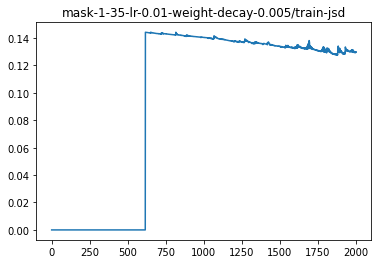

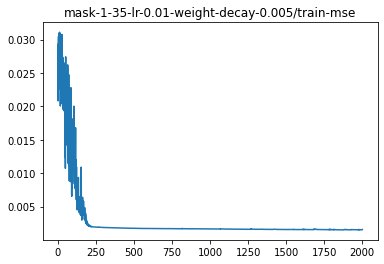

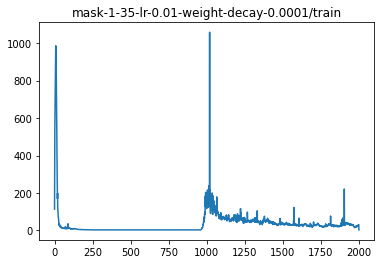

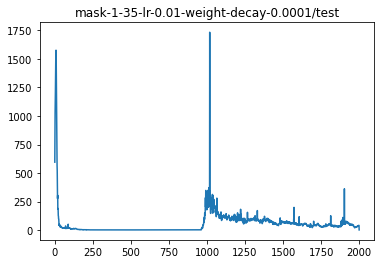

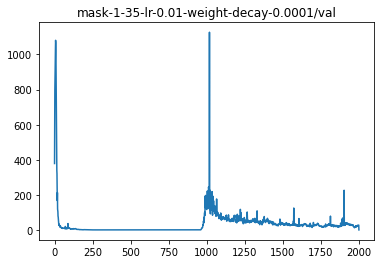

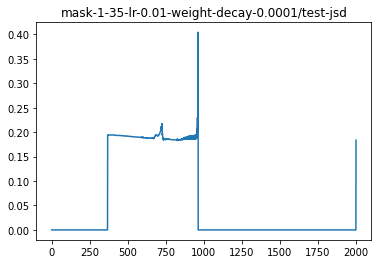

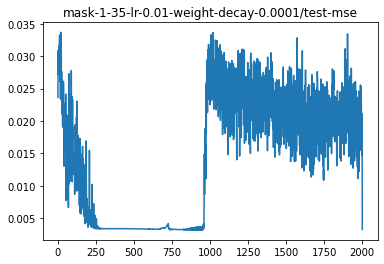

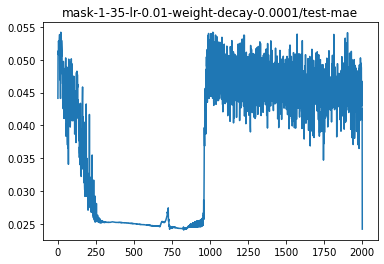

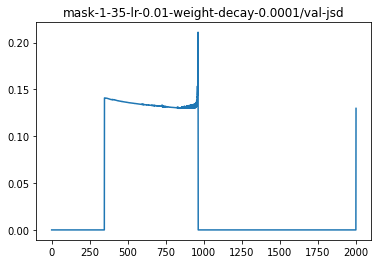

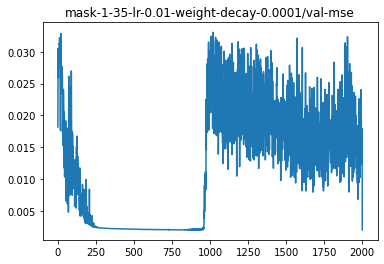

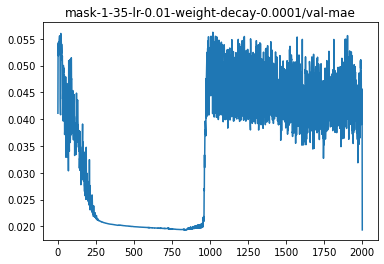

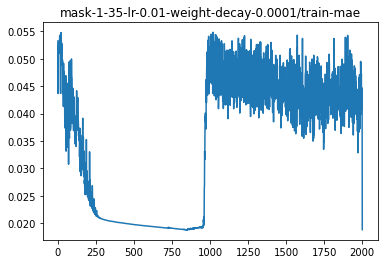

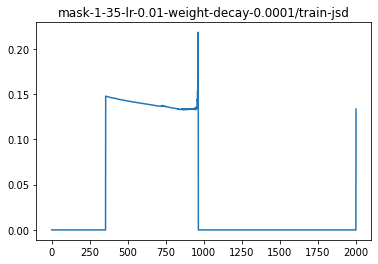

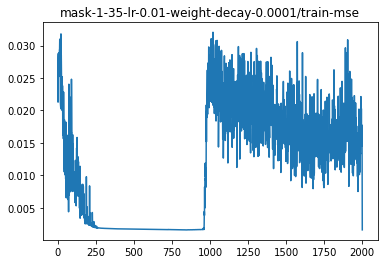

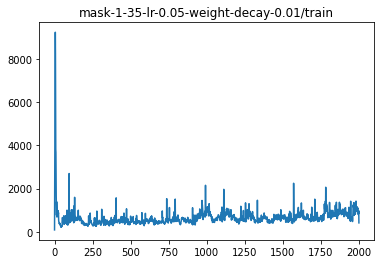

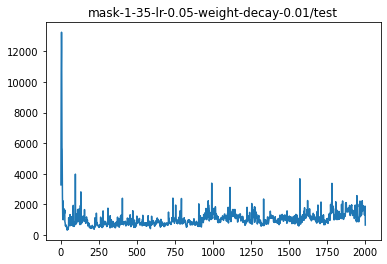

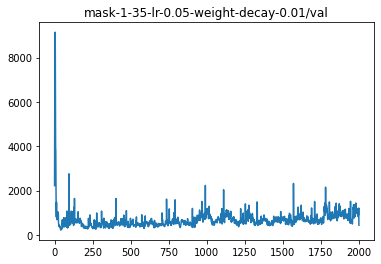

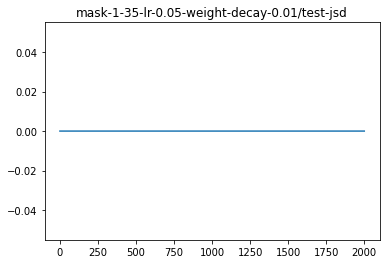

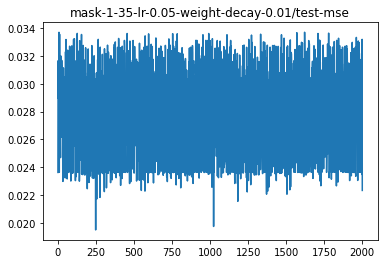

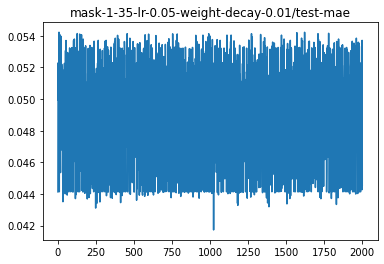

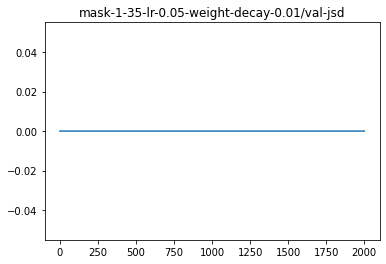

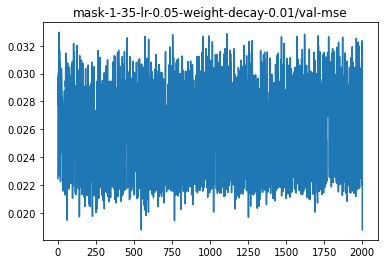

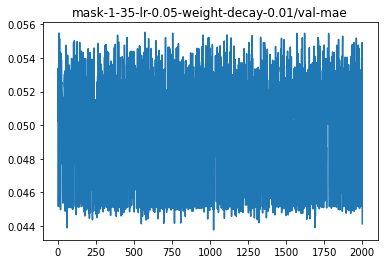

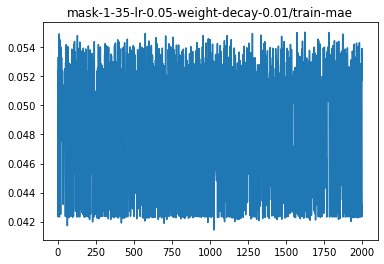

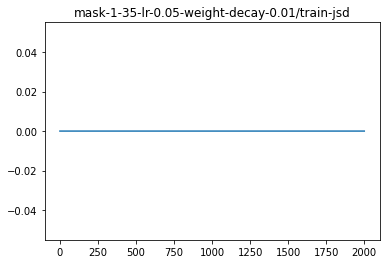

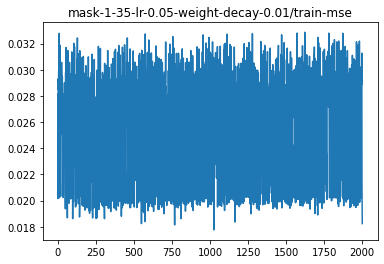

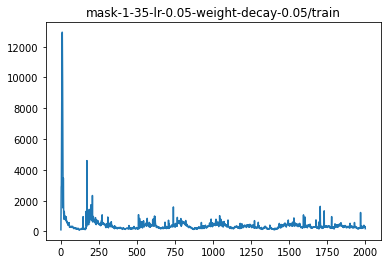

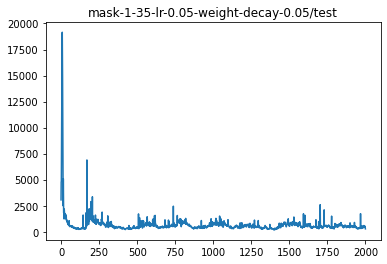

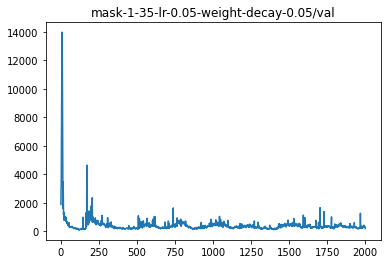

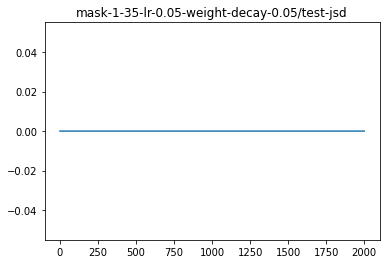

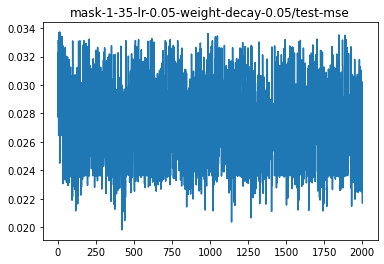

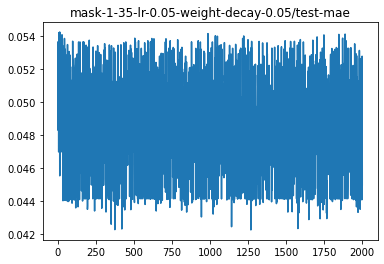

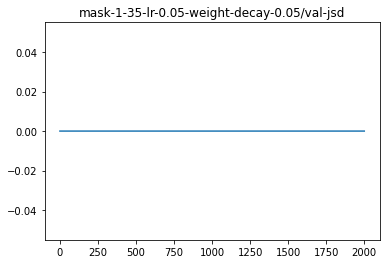

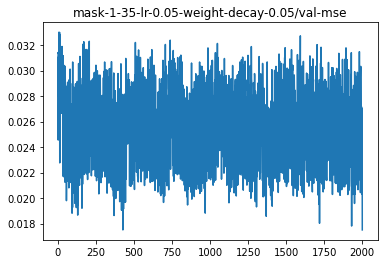

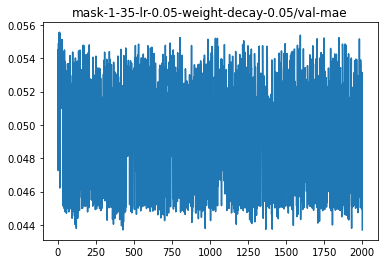

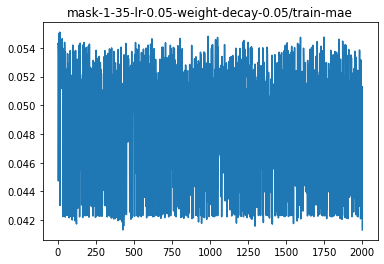

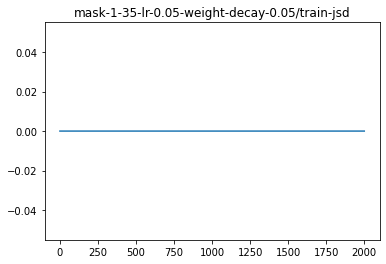

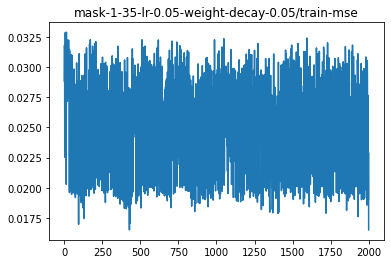

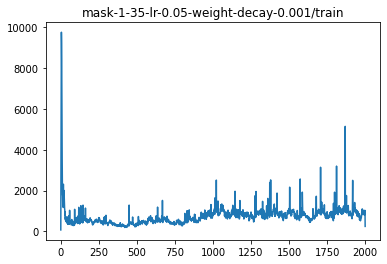

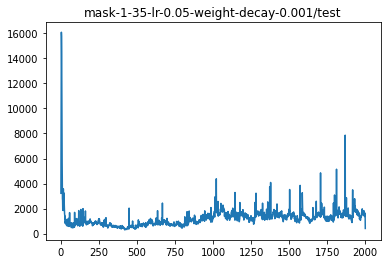

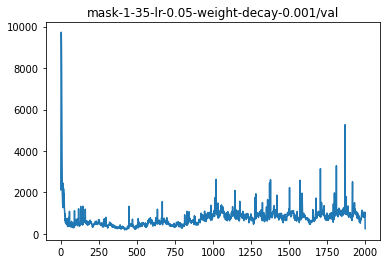

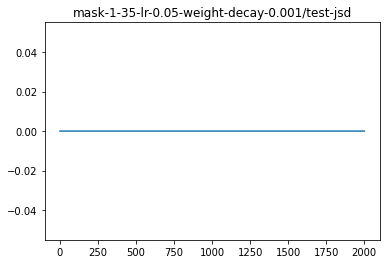

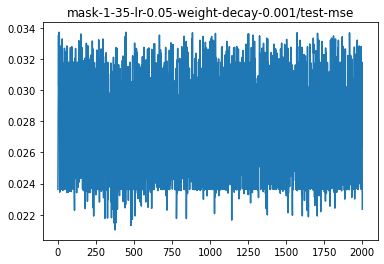

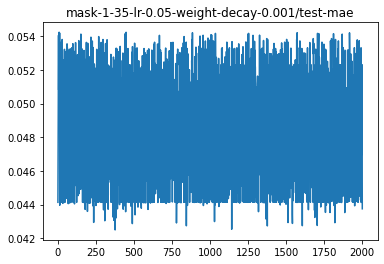

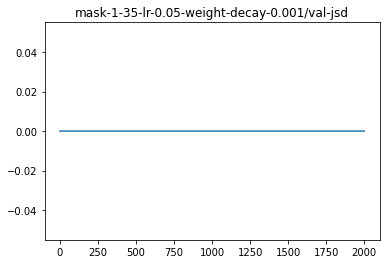

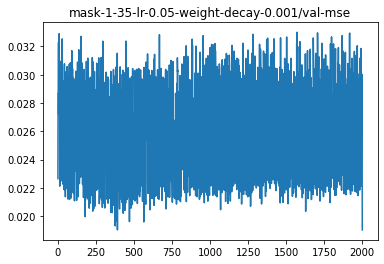

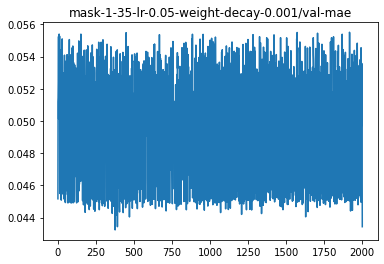

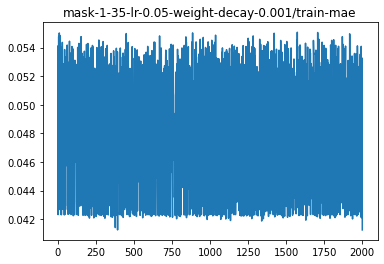

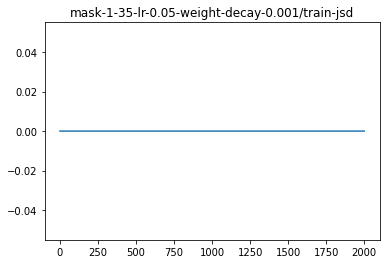

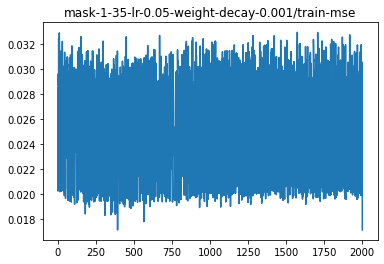

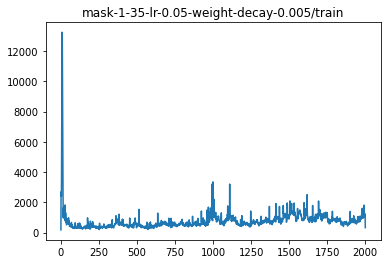

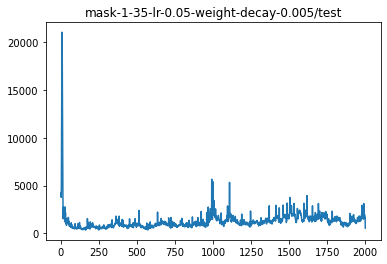

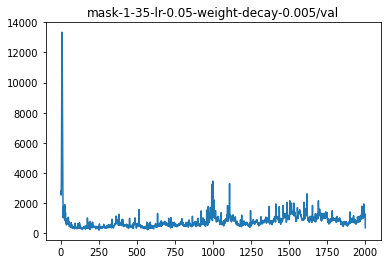

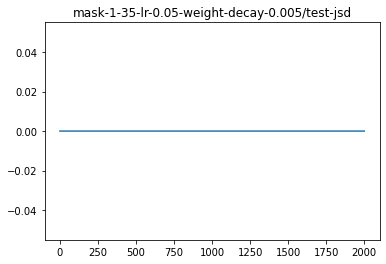

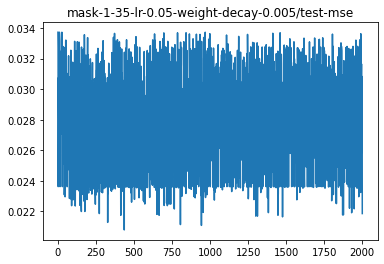

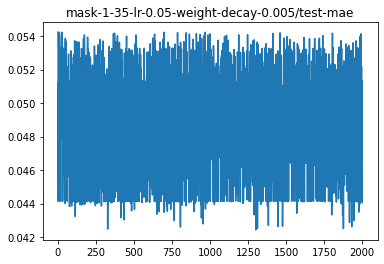

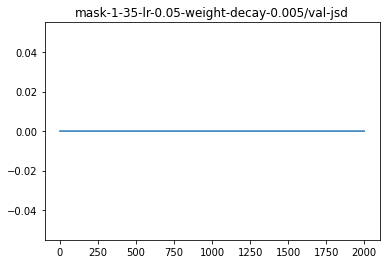

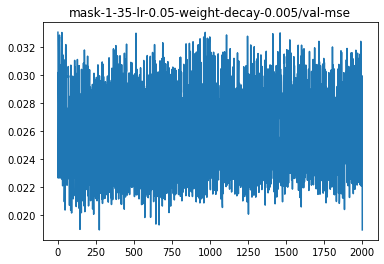

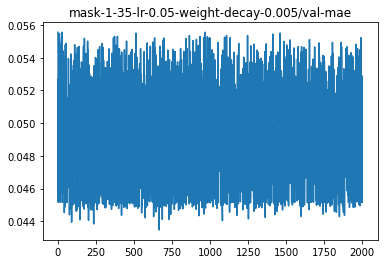

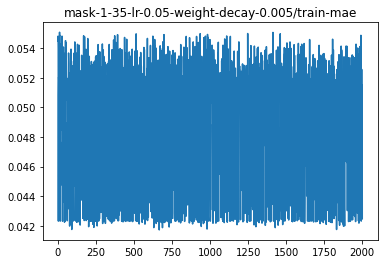

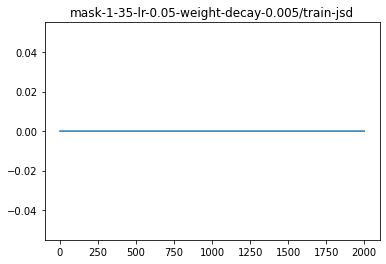

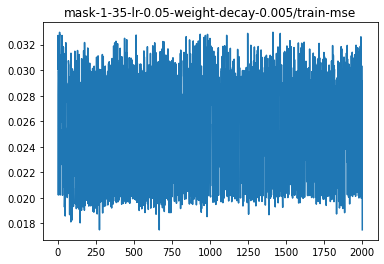

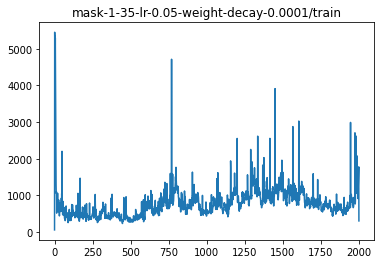

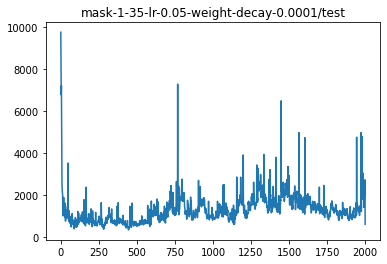

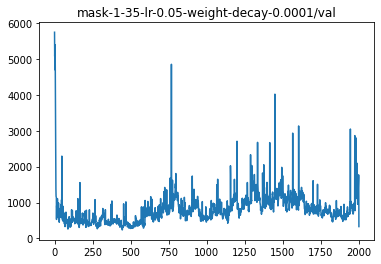

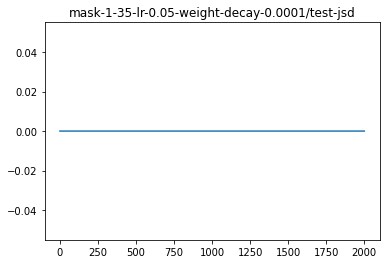

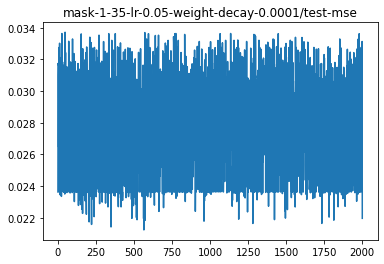

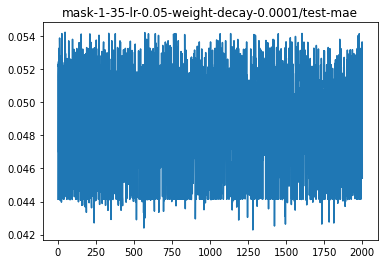

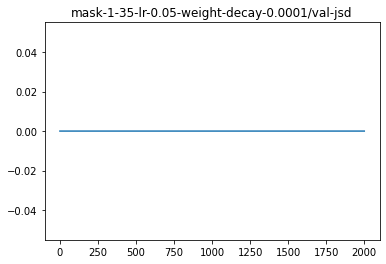

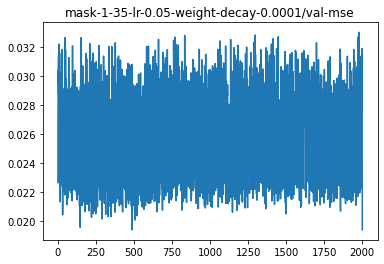

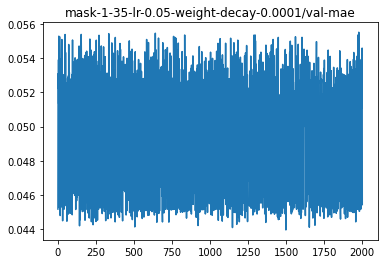

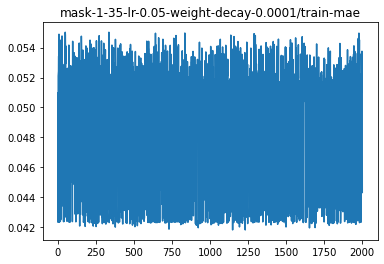

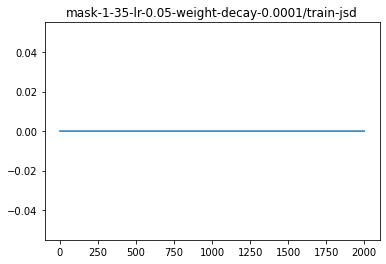

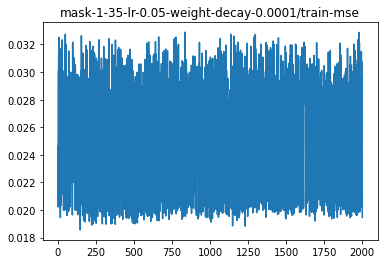

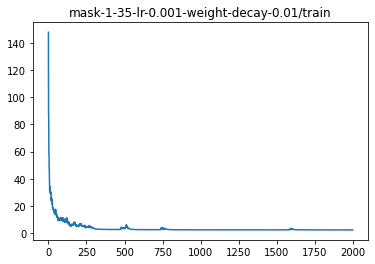

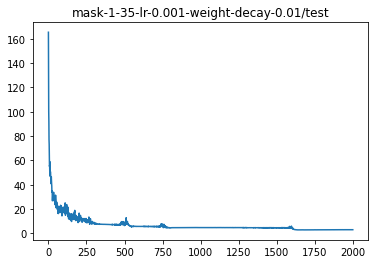

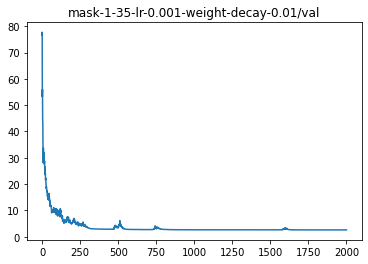

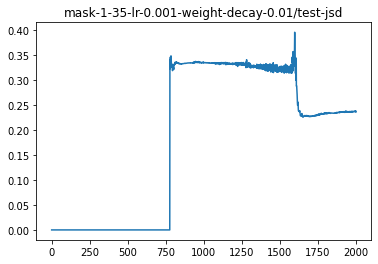

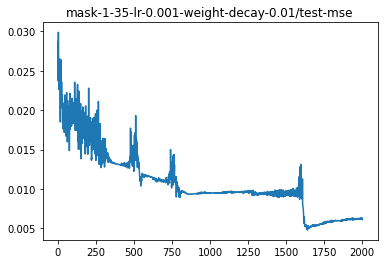

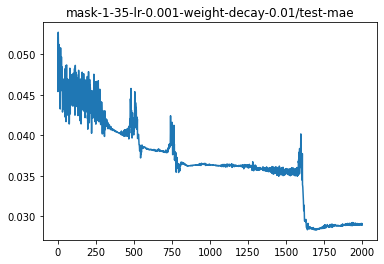

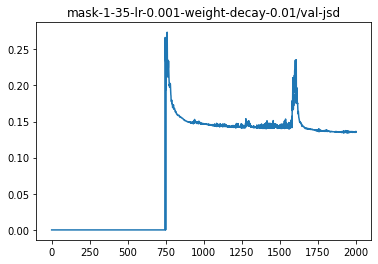

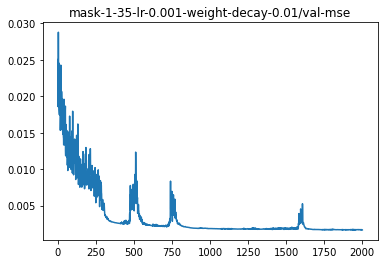

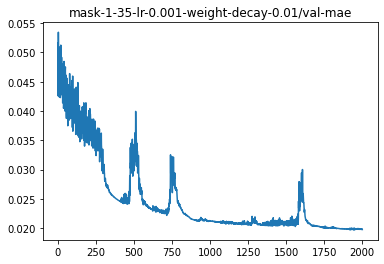

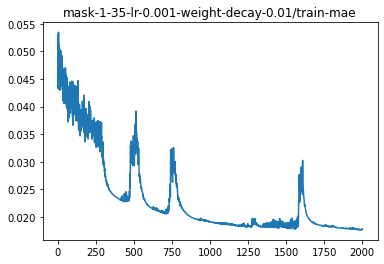

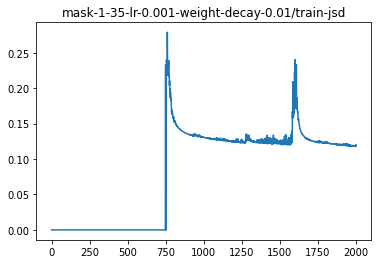

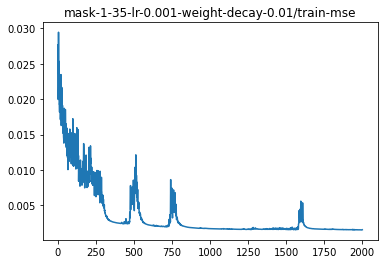

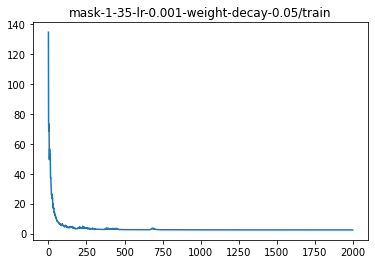

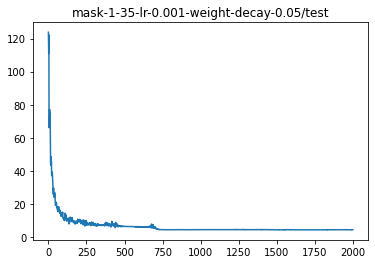

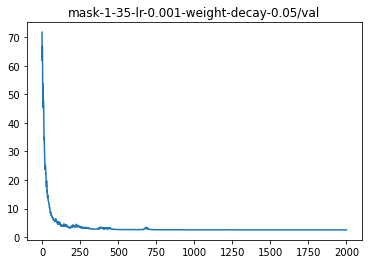

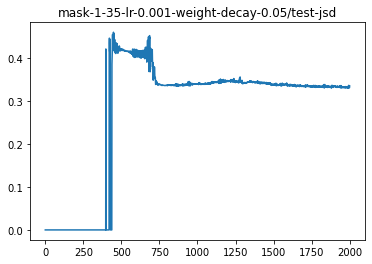

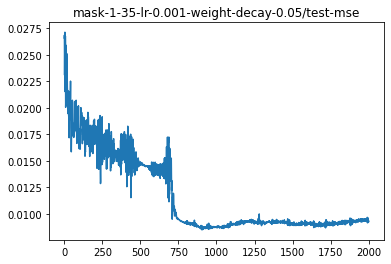

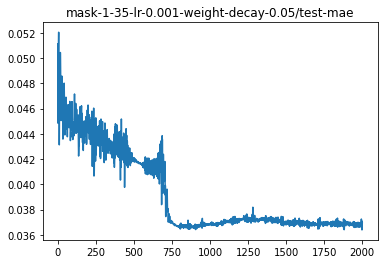

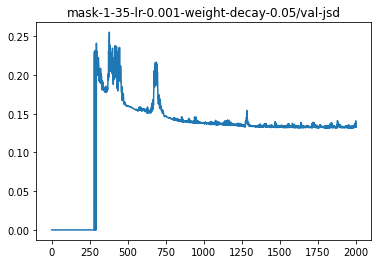

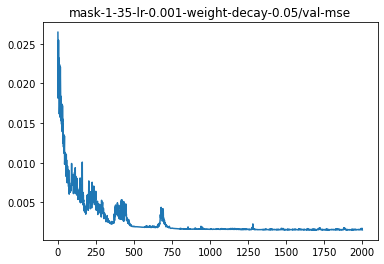

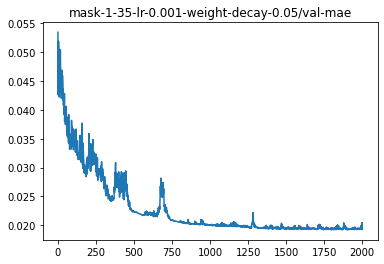

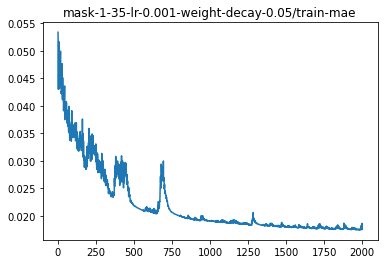

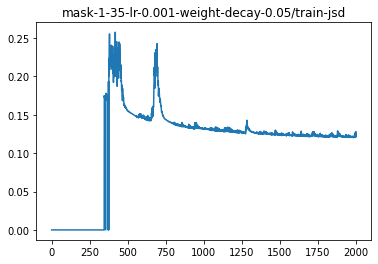

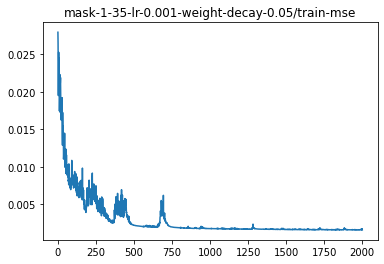

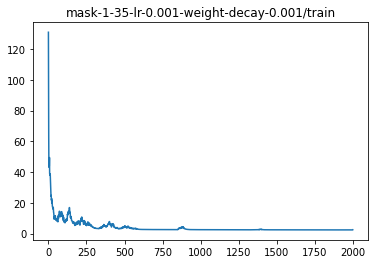

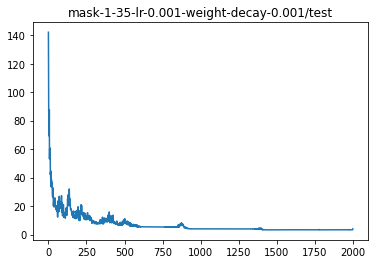

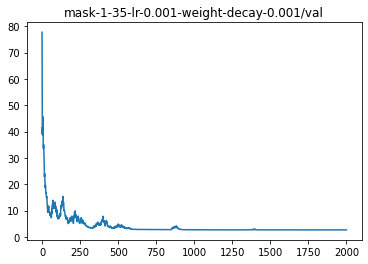

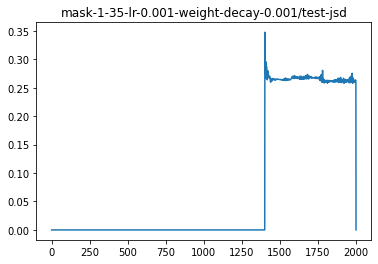

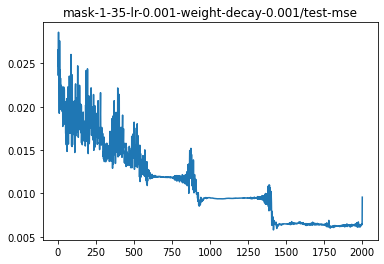

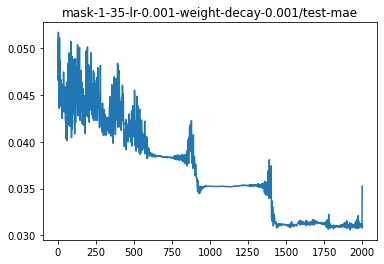

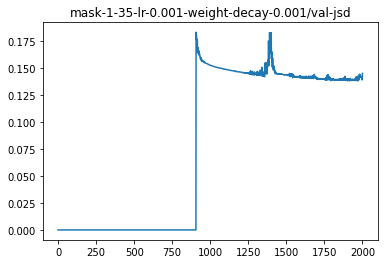

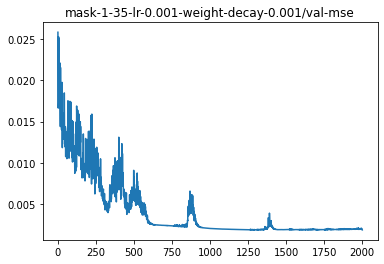

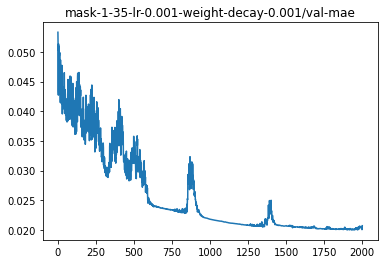

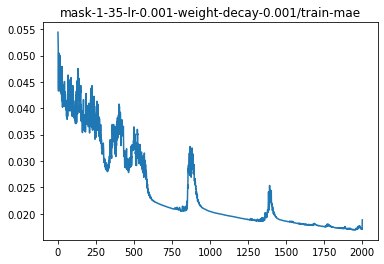

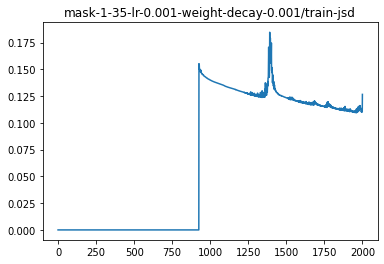

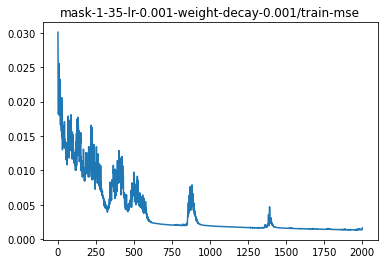

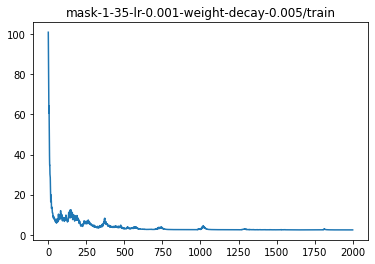

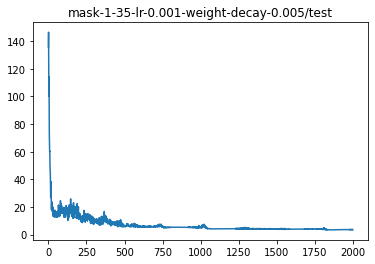

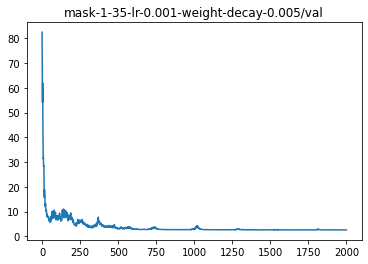

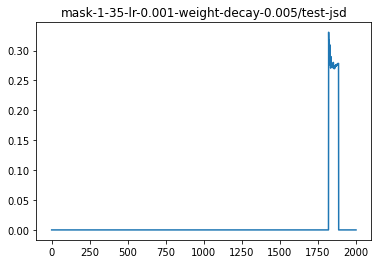

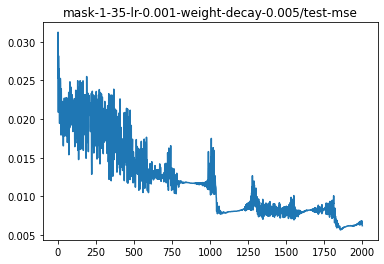

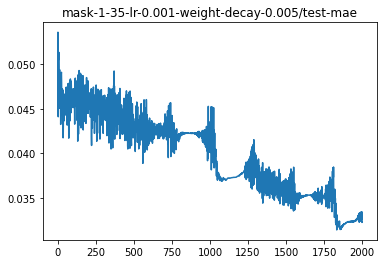

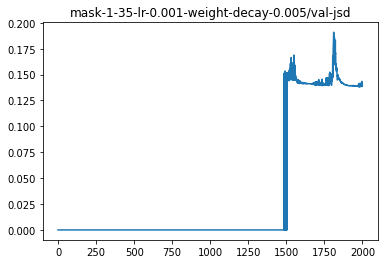

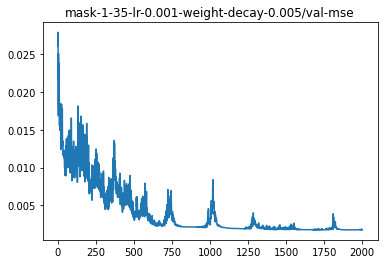

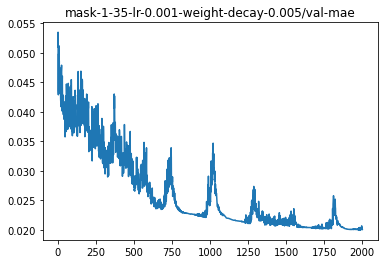

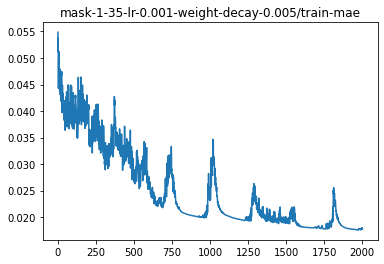

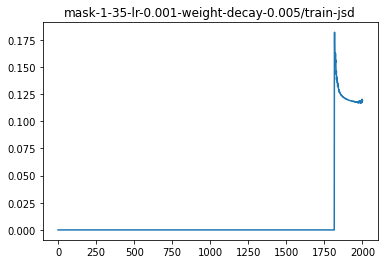

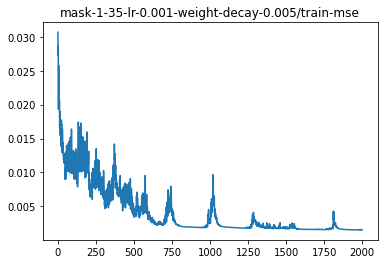

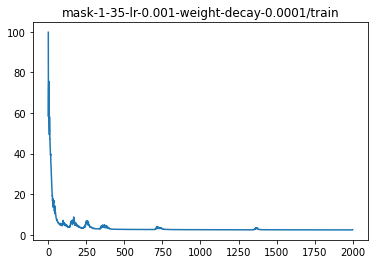

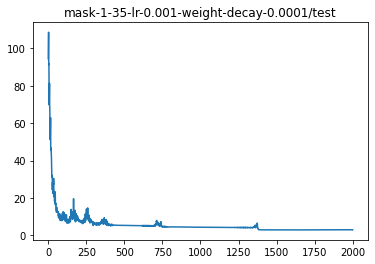

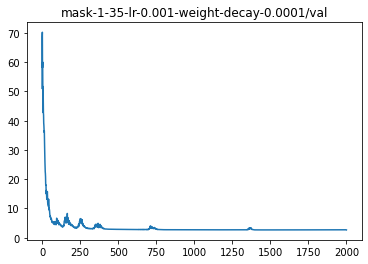

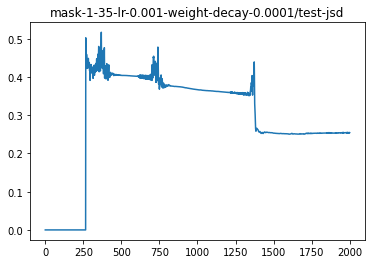

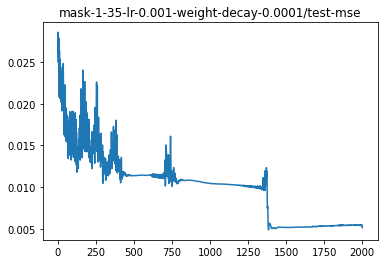

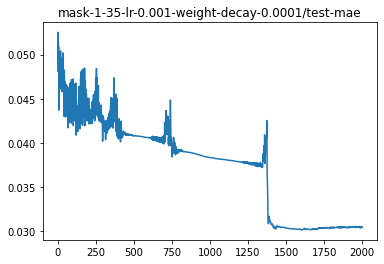

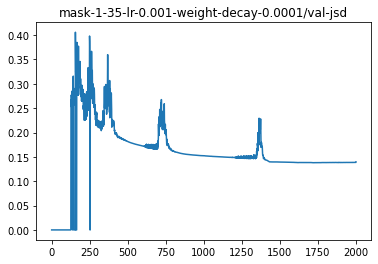

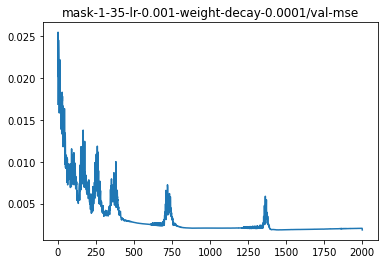

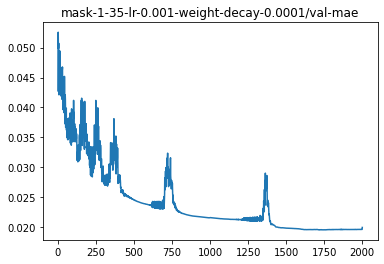

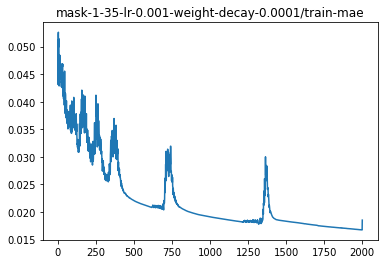

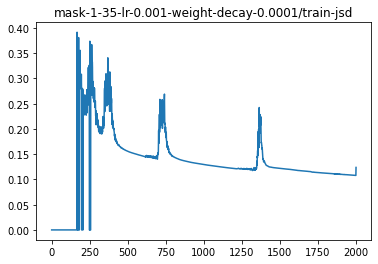

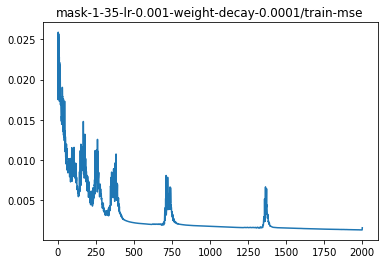

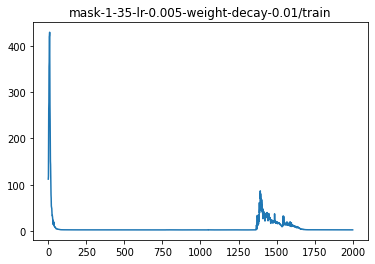

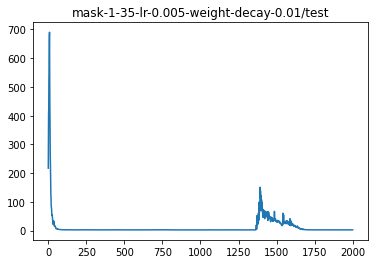

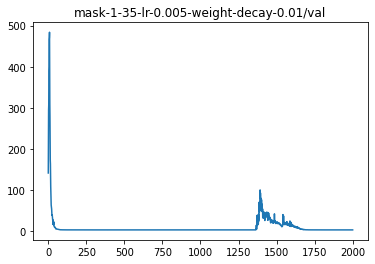

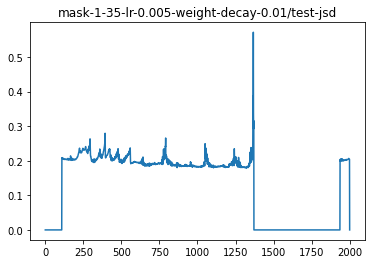

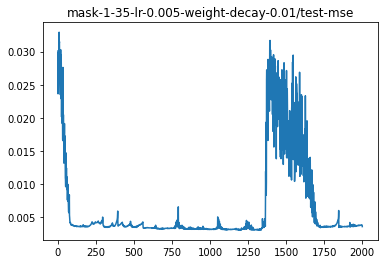

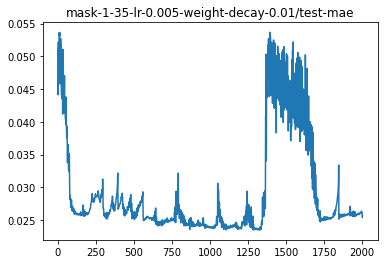

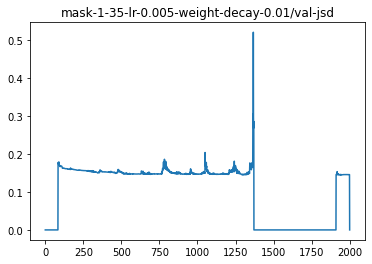

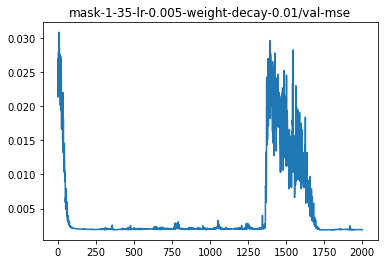

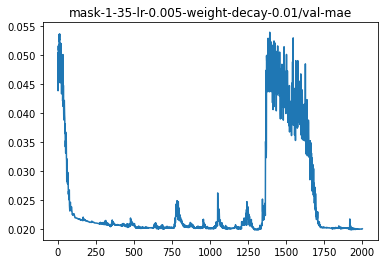

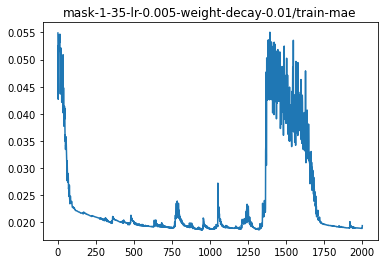

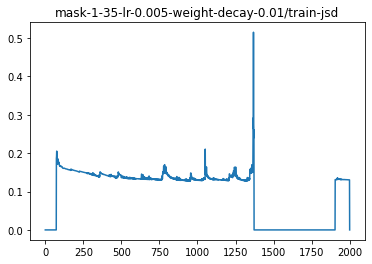

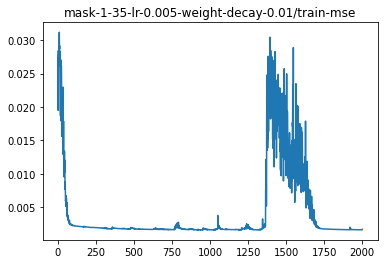

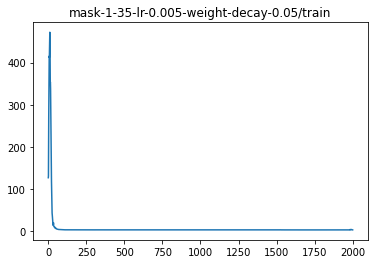

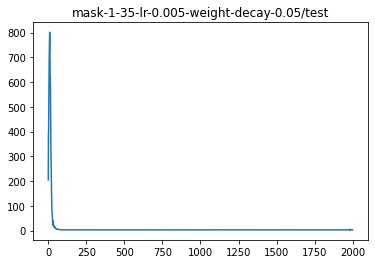

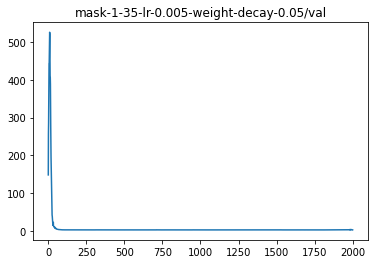

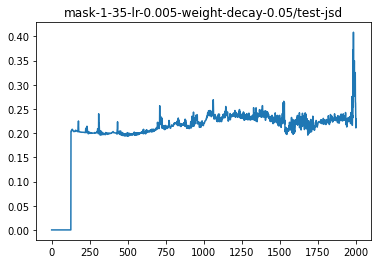

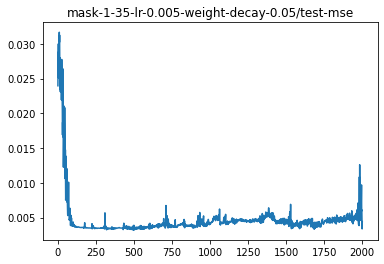

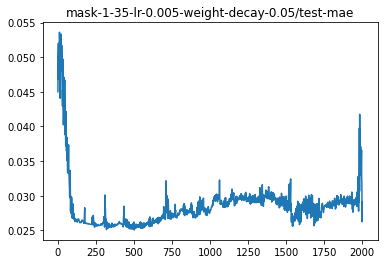

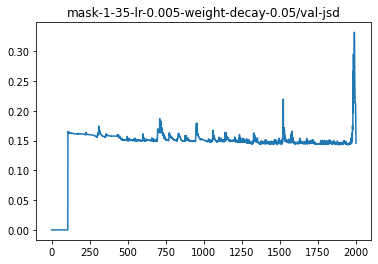

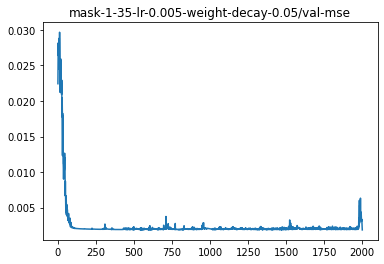

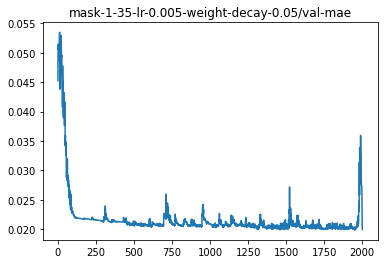

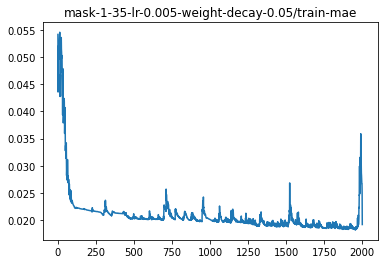

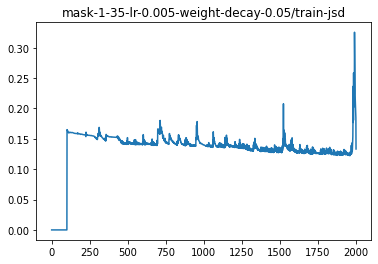

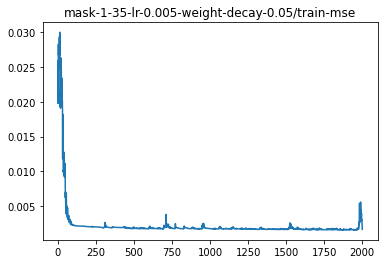

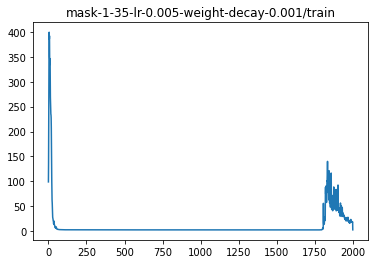

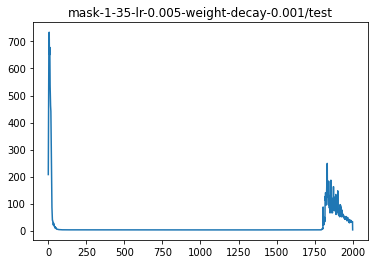

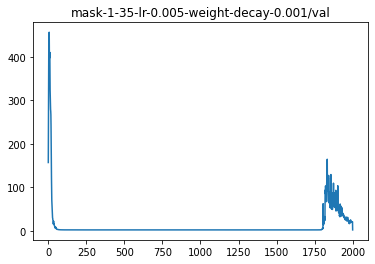

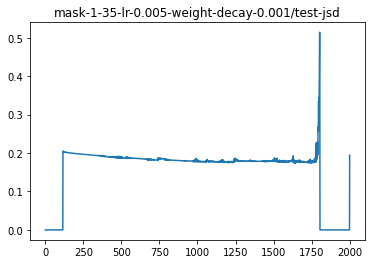

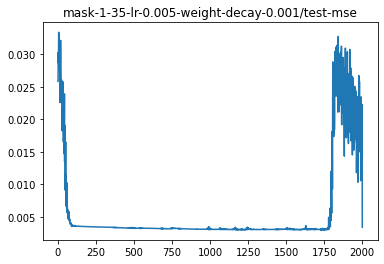

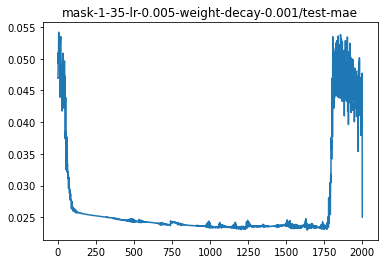

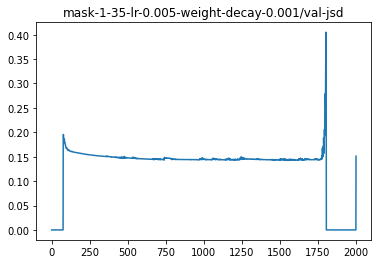

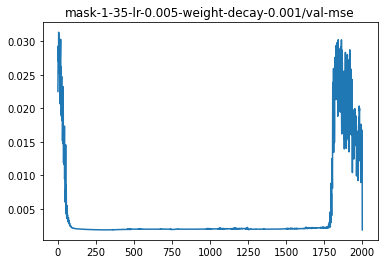

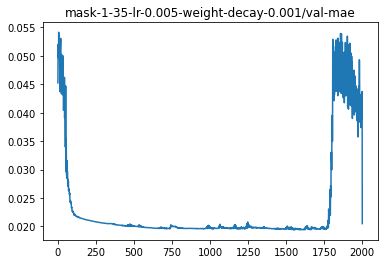

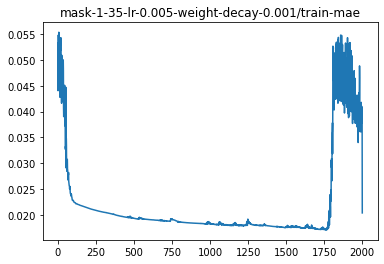

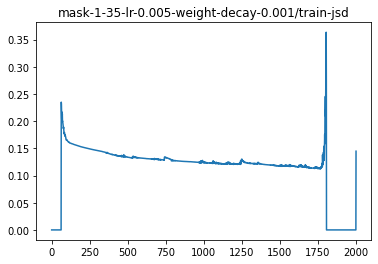

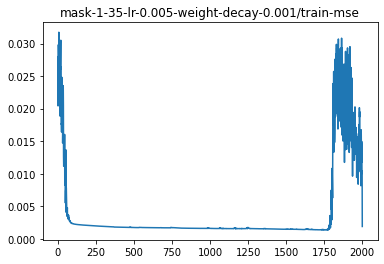

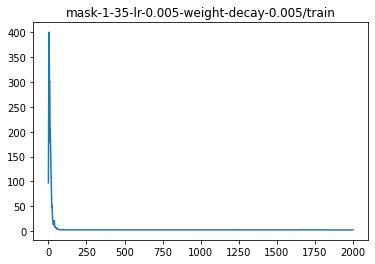

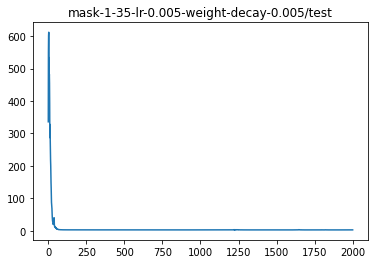

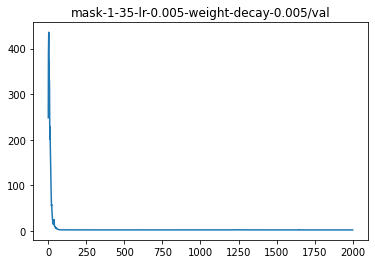

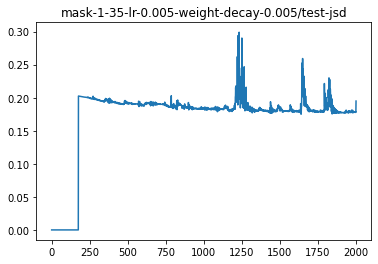

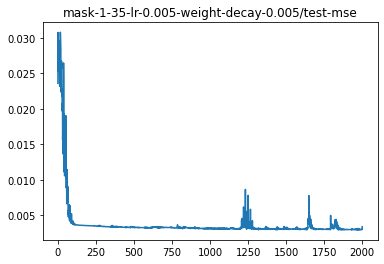

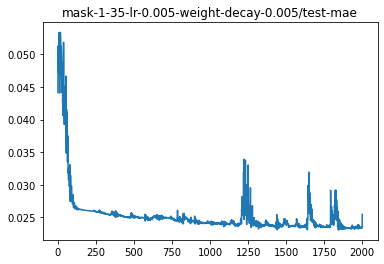

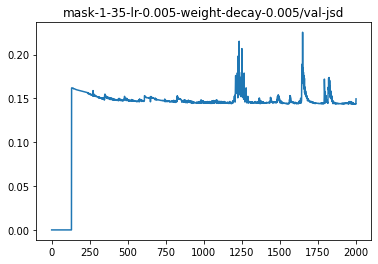

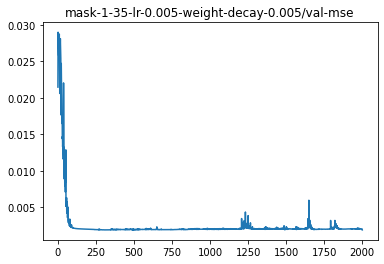

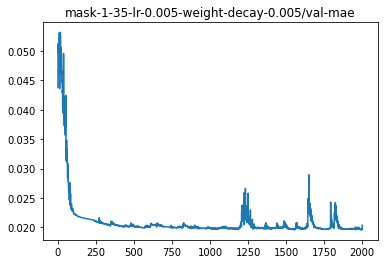

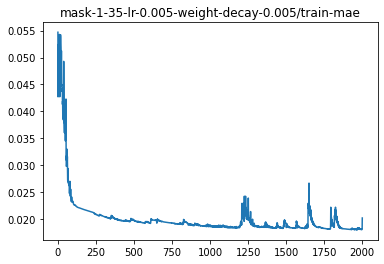

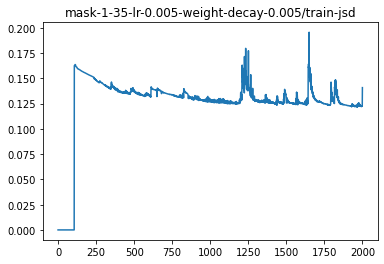

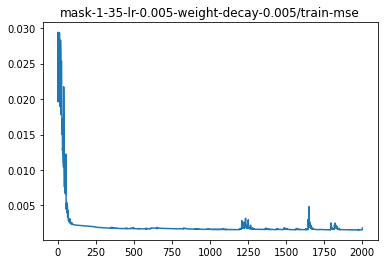

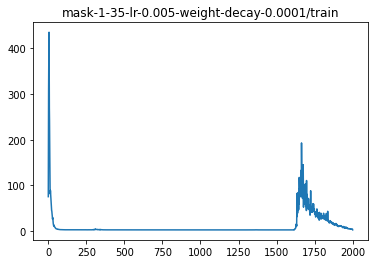

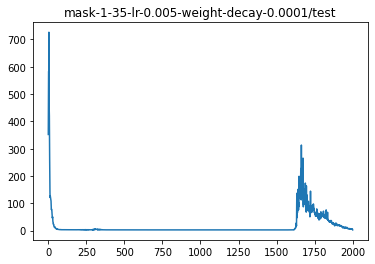

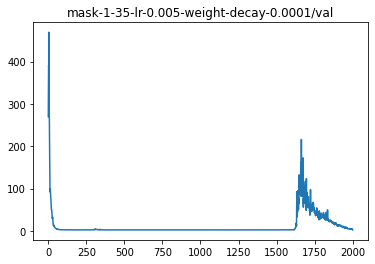

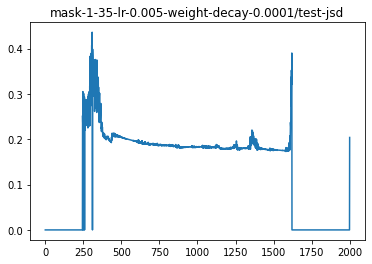

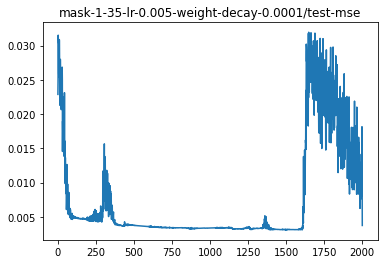

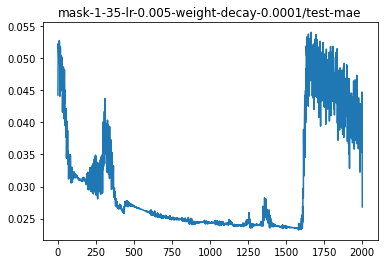

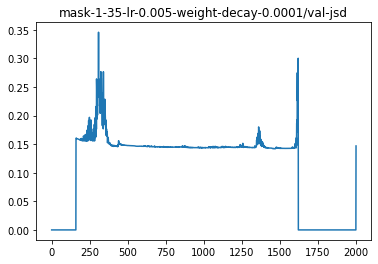

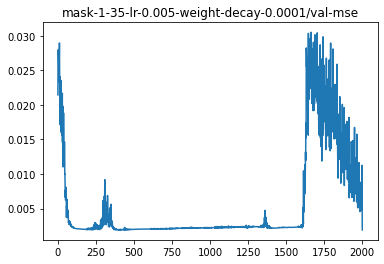

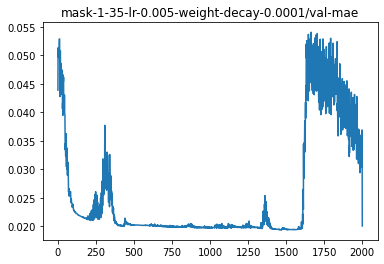

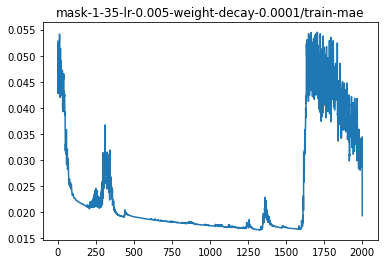

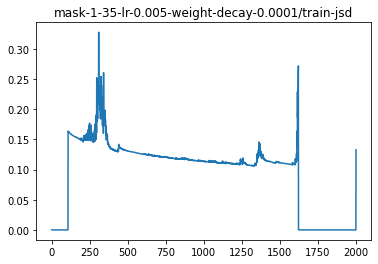

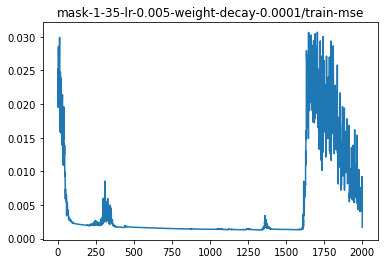

In [ ]:
mylog = HugeLog(fpath="log3.md")
mylog.write("Data Description: "+"\n All is TopK5, Propobability method : A/A.sum(-1)")
mylog.write("All mask will be used!")


# by default, top k (k=5) if threshold is not specified
# graph6 = sample_fovs_graph("/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP19_1139/new/spot_gene_expression.csv",
#                              "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP19_1139/new/ground_truth.csv",
#                            "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP19_1139/new/spot_location.csv",topk=5)
# spot_gene_expression = pd.read_csv("/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP19_1139/new/spot_gene_expression.csv")
# pseudo_spot_lst = [i for i in range(spot_gene_expression.shape[0])]

graph1 = sample_fovs_graph("/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1087_SP20_1098/new/spot_gene_expression.csv",
                      "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1087_SP20_1098/new/ground_truth.csv",
                      "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1087_SP20_1098/new/spot_location.csv", topk=5)


# graph2 = sample_fovs_graph("/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP20_10838/new/spot_gene_expression.csv",
#                       "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP20_10838/new/ground_truth.csv",
#                       "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP20_10838/new/spot_location.csv", topk=5)



graph2 = sample_fovs_graph("/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1087_SP19_4061/new/spot_gene_expression.csv",
                      "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1087_SP19_4061/new/ground_truth.csv",
                      "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1087_SP19_4061/new/spot_location.csv", topk=5)


# graph4 = sample_fovs_graph("/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1081_SP17_2566/new/spot_gene_expression.csv",
#                       "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1081_SP17_2566/new/ground_truth.csv",
#                       "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1081_SP17_2566/new/spot_location.csv", topk=5)


# graph5 = sample_fovs_graph("/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1081_SP18_3323/new/spot_gene_expression.csv",
#                       "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1081_SP18_3323/new/ground_truth.csv",
#                       "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1081_SP18_3323/new/spot_location.csv", topk=5)


# graph1 = sample_fovs_graph("/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP21_213/new/spot_gene_expression.csv",
#                       "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP21_213/new/ground_truth.csv",
#                       "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP21_213/new/spot_location.csv", topk=5)


# graph2 = sample_fovs_graph("/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP20_642/new/spot_gene_expression.csv",
#                       "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP20_642/new/ground_truth.csv",
#                       "/content/drive/MyDrive/CosMx_benchmark_pro/data/kidney/Run1080_SP20_642/new/spot_location.csv", topk=5)



# total_graph = mydata.union_graph([graph1, graph2, graph3, graph4],topk=5)
total_graph = union_graph([graph1, graph2], topk=5)


# test_mask, train_mask, val_mask = mydata.mask_graph(total_graph, masked_graph_idx=masked_graph_idx)

lrs = [0.01,0.05,0.001,0.005]
# lrs = [0.01]

weight_decay_list = [0.01, 0.05, 0.001, 0.005, 0.0001]
# weight_decay_list = [0.01]


masked_jobs = [[1]]
# masked_jobs = [[0], [1], [2]]

for lr in lrs:
  for masked_graph_idx in masked_jobs:

    test_mask, train_mask, val_mask = mask_graph(total_graph, masked_graph_idx=masked_graph_idx)
    # import ipdb
    # ipdb.set_trace()

    data = pyg_data_maker(total_graph.X,
                          total_graph.label,
                          total_graph.adj_link.T,
                          total_graph.adj_weight,
                          train_mask,
                          val_mask,
                          test_mask,
                          x_preprocess=False)

    mask_description = "mask-{}".format("-".join(str(i) for i in masked_graph_idx))

    # job1
    for weight_decay in weight_decay_list:
      # test_type = list(range(18))
      # test_type = list(range(38)) # ground truth: cell type: 38
      test_type = list(range(35)) # ground truth: cell type: 35
      total_loss_collect = defaultdict(list)

      model = test_with_masked_type(test_type=test_type)

      prefix = "{}-{}-lr-{}-weight-decay-{}".format(mask_description,len(test_type), lr, weight_decay)
      mylog.write("# "+ prefix)
      saveResult(prefix)
      savefig(prefix)
      logrecord()
      outputSave(prefix, data=data)

    # job2
    # for weight_decay in weight_decay_list:
    #   test_type = list(range(1,18))
    #   total_loss_collect = defaultdict(list)

    #   model = test_with_masked_type(test_type=test_type)

    #   prefix = "{}-{}-lr-{}-weight-decay-{}".format(mask_description,len(test_type), lr, weight_decay)
    #   mylog.write("# "+ prefix)
    #   saveResult(prefix)
    #   savefig(prefix)
    #   logrecord()
    #   outputSave(prefix, data=data)


m = open("log3.md",'r').read().split('\n')
content = defaultdict(list)
prefix = None
flag = True
columns = []
for idx in range(len(m)):
  if len(m[idx]) > 1:
    if m[idx][0] == "#":
      if prefix and flag:
        flag = False
      prefix = m[idx][2:]
      if "log2" in prefix:
        prefix = prefix[5:]
    elif prefix :
      if flag:
        columns.append(m[idx].split(":")[0])
      content[prefix].append(m[idx].split(":")[1])
klist = list(content.keys())
for i in klist:
  content[i] = content[i][:26]
df = pd.DataFrame(content).T
df.columns = columns
df.to_excel("res2.xlsx")



In [ ]:
os.mkdir("result")
!mv *.csv result
!mv *.xlsx result
!mv log3.md result


In [ ]:
!mv result kidney_1_5_5
!cp -r ./kidney_1_5_5 /content/drive/MyDrive/CosMx_benchmark_pro/overall_result/kidney/